**Problem Statement:**

**Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:**

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

**Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw0**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
data=pd.read_csv("database_IND.csv")

In [3]:
#checking the overview of the data
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#checking for shape
data.shape

(907, 27)

**So we can see that there are 907 rows and 27 columns in the dataset.**

In [5]:
#checking for null values
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**In this we can see that column latitude have 46 null values,longitude have 46 null values,other fuel1 have 709 null values,other fuel2 have 906 null values,other fuel3 have907 null values,commisioning year have 380 null values, owner have 565 null values,geolocation source have 19 null values, wepp id have 907 null values,year of capacity data have 388 null values,generation gwh 2013 have 907 null values,generation gwh 2014 have 509 null values,generation gwh 2015 have 485 null values,generation gwh 2016 have 473 null values,generation gwh 2017 have 467 null values,generation gwh 2018 have 459 null values,generation gwh 2019 have 907 null values,genaration data source have 458 null values and eastimated generation gwh have 907 null values.**

In [6]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

**In this we can see that 15 columns have float type of data and 12 columns have object data type that is string data type.**

In [7]:
#checking the names of the columns
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

**This are the names of the columns present in the dataset.**

In [8]:
#checking for description of data
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


**Observation**
* **In column capacity_mw we can see that mean is less than standard deviation, data is also not distributed normally.**
* **In column other fuel3 we can see that null values are present.**
* **In column latitude,longitude, other fuel3,commisioning year,wepp id,year of capacity data,genreration gwh 2013,genreration gwh 2014,genreration gwh 2015,genreration gwh 2016,genreration gwh 2017,genreration gwh 2018,genreration gwh 2019 and estimated geneartion growth null values present.**
* **By looking at most of the columns we can see that data is not distributed normally.**

**Since we can see that in column other fuel 2,other fuel 3,wepp id,geneartion gwh 2013,generation gwh 2019 and estimated generation gwh most of the data that is more 98% of data is null values, so it will be useless to keep such data.that i why iam dropping this columns.**

In [9]:
#dropping columns in which most of the null values are present
data=data.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**So we can see that 6 columns have been dropped.**

**Checking for unique values**

In [10]:
#checking for unique values
data['country'].unique()

array(['IND'], dtype=object)

**This column gives us the information of the country code name, in this only one coutry name is there which is given in 3 character country code that is IND.**

In [11]:
#checking for unique values
data['country_long'].unique()

array(['India'], dtype=object)

**This column gives is the information about the name of the country designation in full form, so india is the only one unique name in this column.**

In [12]:
#checking for unique values
data['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

**This column gives us the information of name or title of the plant.**

In [13]:
#checking for number unique values
data['name'].nunique()

907

**There are about 907 plants are there in this dataset.**

In [14]:
#checking for unique values
data['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

**This column gives us the information about the 10 or 12 character identifier for the plant.**

In [15]:
#checking for number unique values
data['gppd_idnr'].nunique()

907

**There are 907 unique values in this column**

In [16]:
#checking for unique values
data['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

**This column gives us the information about the electrical generating capacity in megawatts.**

In [17]:
#checking for number unique values
data['capacity_mw'].nunique()

361

**There are 361 unique values present in this column.**

In [18]:
#checking for unique values
data['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

**This column gives us the information about geolocation in decimal degrees.**

In [19]:
#checking for number unique values
data['latitude'].nunique()

836

**In this column 836 unique values are present.**

In [20]:
#checking for unique values
data['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

**This column gives us the information about geolocation in decimal degrees.**

In [21]:
#checking for number unique values
data['longitude'].nunique()

827

**In this column there are about 827 unique values are present.**

In [22]:
#checking for unique values
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

**This column gives us the information about energy source used in primary electricity generation or export.So in plants they have used solar,coal,wind,gas,hydro,biomass and oil as a energy source**

In [23]:
#checking for unique values
data['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

**This column gives us the information about energy source used in electricity generation or export, so this is the other fuel which is not a primary fuel.It consist of oil,cogeneration and gas.There are null values present in this column**

In [24]:
#checking for unique values
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

**This column gives us the information about year of plant operation, weighted by unit-capacity when data is available.**

In [25]:
#checking for number unique values
data['commissioning_year'].nunique()

73

**There are 73 unique values present in this column.Null values are also present.**

In [26]:
#checking for unique values
data['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

**This column gives us the information about majority shareholder of the power plant, generally in Romanized form.**

In [27]:
#checking for number unique values
data['owner'].nunique()

280

**In this column 280 unique values are present.**

In [28]:
#checking for unique values
data['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

**This column gives us the information about entity reporting the data; could be an organization, report, or document, generally in Romanized form**

In [29]:
#checking for number unique values
data['source'].nunique()

191

**There are 191 unique values prsent in this column.**

In [30]:
#checking for unique values
data['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

**This column gives us the information about web document corresponding to the source field.**

In [31]:
#checking for number unique values
data['url'].nunique()

304

**In this column there are about 304 unique values present.**

In [32]:
#checking for unique values
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

**This column gives us the information about the attribution for geolocation information which inlcudes National renewable energy laboratory, wri and industry about.**

In [33]:
#checking for unique values
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

**This column gives us the information about year the capacity information was reported.So it was reported in year 2019.**

In [34]:
#checking for unique values
data['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

**This column gives us the information about the electricity generation in gigawatt-hours reported for the year 2014.**

In [35]:
#checking for number unique values
data['generation_gwh_2014'].nunique()

371

**In this column there are about 371 unique values are present.**

In [36]:
#checking for unique values
data['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

**This column gives us the information about the electricity generation in gigawatt-hours reported for the year 2015.**

In [37]:
#checking for number unique values
data['generation_gwh_2015'].nunique()

396

**In this column there are about 396 unique values are present.**

In [38]:
#checking for unique values
data['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

**This column gives us the information about the electricity generation in gigawatt-hours reported for the year 2016.**

In [39]:
#checking for number unique values
data['generation_gwh_2016'].nunique()

403

**In this column there are about 403 unique values are present.**

In [40]:
#checking for unique values
data['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

**This column gives us the information about the electricity generation in gigawatt-hours reported for the year 2017.**

In [41]:
#checking for number unique values
data['generation_gwh_2017'].nunique()

408

**In this column there are about 408 unique values are present.**

In [42]:
#checking for unique values
data['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

**This column gives us the information about the electricity generation in gigawatt-hours reported for the year 2018.**

In [43]:
#checking for number unique values
data['generation_gwh_2018'].nunique()

410

**In this column there are about 410 unique values are present.**

In [44]:
#checking for unique values
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

**This column gives us the information about the attribution for the reported generation information.**

**Checking for value counts**

In [45]:
#checking value counts
data['country'].value_counts()

IND    907
Name: country, dtype: int64

**Since there is only one value on this column and its just the label code, so its better to drop the column.so further i will drop this column**

In [46]:
#checking value counts
data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

**In this column i can see all the rows have a single value, and its not relevent for predicting.so further i will drop this column.**

In [47]:
#checking value counts
data['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

**As this column guves the name or the title of the plant, which not relevent at the time of predicting.so further i will drop this column.**

In [48]:
#checking value counts
data['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

**This column gives us the information about the character identifier as it looks like a unique id on which all the details of power plant is saved.so it wont be relevent at the time of predicting.so further i will be dropping this column.**

In [49]:
#checking value counts
data['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

**In this column we can see that 5mw that is electrical generating capacity is reported in most of the plants.**

In [50]:
#checking value counts
data['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

**In this we can see that 3 plants latitude is the same that is 19.0004.**

In [51]:
#checking value counts
data['longitude'].value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

**In this we can see that 4 plants longiitude is the same that is 71.6917.**

In [52]:
#checking value counts
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

**In this we can see that most of the plant use coal as there primary fuel, 251 plants use hydro,127 plants use solar,123 plants use wind,69 plants use gas,50 plants use biomass,20 plants use oil and 9 plants use Nuclear as primary fuel.**

In [53]:
#checking value counts
data['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

**In this we can see that 195 plants use oil as other fuels,2 plants use gas as the other fuel and 1 plant use cogeneration as other duel.Rest of the plants data have null values.Almost more than 75% of the data is filled with null values.we cant use mode and fill the null values because this is the case of fuel,  we cant use mode method use put that value for every plant.so its better to delete the column.so further i will be dropping this column.** 

In [54]:
#checking value counts
data['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

**In this we can see that most of the plants were operated in the year 2015.**

In [55]:
#checking value counts
data['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

**In this column we can see that Acc Acc ltd,Sterling Agro Industries ltd and Jk Cement ltd and have owned 4 plants each and followed by others.so this gives us the only info about the owners which is not relevant for prediction.so further i will be dropping this column.**

In [56]:
#checking value counts
data['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

**In this we can see that most of the plants data that is 519 plants data is reported by Central Electricity Authority.So in this we are getting the information of the sources that are reporting the data which is not relevant for prediction so further i will be dropping this column.**

In [57]:
#checking value counts
data['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

**In this we can see the urls of the entity and it not relevant at the time of prediction so further i will drop this column.**

In [58]:
#checking value counts
data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

**In this we can see that most of the plants geolocation source is WRI that is for 765 plants, for 119 plants Industry about and for 4 plants National Renewable Energy Laboratory.so this is giving us the information about the geolocation source which is not usefull for  predction.so further i will drop this column.**

In [59]:
#checking value counts
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

**In this column we can see that most of the plants capacity was reported un year 2019.So this gives us the information about the year in which capacity was reported.so i dnt find it relevant for building the model so dropping the column.**

In [60]:
#checking value counts
data['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

**Most of the plants electricity generated was 0.000000 gigawatt-hours were reported.**

In [61]:
#checking value counts
data['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

**Most of the plants electricity generated was 0.000000 gigawatt-hours were reported.**

In [62]:
#checking value counts
data['generation_gwh_2016'].value_counts()

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

**Most of the plants electricity generated was 0.000000 gigawatt-hours were reported.**

In [63]:
#checking value counts
data['generation_gwh_2017'].value_counts()

0.00000        32
170.08530       2
663.77450       1
1632.36715      1
272.73945       1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 408, dtype: int64

**Most of the plants electricity generated was 0.000000 gigawatt-hours were reported.**

In [64]:
#checking value counts
data['generation_gwh_2018'].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

**Most of the plants electricity generated was 0.000000 gigawatt-hours were reported.**

In [65]:
#checking value counts
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

**In this we can see that most of the plants data generation source is Central Electricity Authority.So it just giving us the information about the data generation source,so i find it irrelevant,so further i will be dropping this column**

In [66]:
#dropping unwanted columns
data=data.drop(['country','country_long','name','gppd_idnr','other_fuel1','owner','url','source','geolocation_source','year_of_capacity_data','generation_data_source'],axis=1)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#checking for null values
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [68]:
#filling null values
data['latitude'].mode()

0    19.0004
1    24.1917
Name: latitude, dtype: float64

In [69]:
data['longitude'].mode()

0    71.6917
Name: longitude, dtype: float64

In [70]:
data['commissioning_year'].mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [71]:
data['latitude']=data['latitude'].fillna(data['latitude'].mode()[0])
data['longitude']=data['longitude'].fillna(data['longitude'].mode()[0])
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])

In [72]:
#checnking for null values
data.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

**So we can see that null values from column latitude,longitude and commissioning year have been filled.**

In [73]:
#checking for mean value of capacity generated using each of the fuel
data.groupby('primary_fuel')['capacity_mw'].mean()

primary_fuel
Biomass     20.065200
Coal       797.826434
Gas        364.818928
Hydro      185.026972
Nuclear    975.555556
Oil         88.942000
Solar       21.712598
Wind        33.429675
Name: capacity_mw, dtype: float64

In [74]:
#checking mean value of capacity genereted in year 2014 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [75]:
#checking mean value of capacity genereted in year 2015 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

In [76]:
#checking mean value of capacity genereted in year 2016 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Biomass            NaN
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Solar              NaN
Wind               NaN
Name: generation_gwh_2016, dtype: float64

In [77]:
#checking mean value of capacity genereted in year 2017 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Biomass            NaN
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Solar              NaN
Wind               NaN
Name: generation_gwh_2017, dtype: float64

In [78]:
#checking mean value of capacity genereted in year 2018 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Biomass            NaN
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Solar              NaN
Wind               NaN
Name: generation_gwh_2018, dtype: float64

**So we can see that in column generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 whenever primary fuel Biomass,solar and wind was used this columns showing null values and simply i cannot put any value using mode in this columns.so i am dropping this rows with primary fuel as Biamass,solar and wind.** 

In [79]:
#checnking for value counts
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [80]:
#dropping rows where primary_fuel=Biomass,Solar,wind
data=data.drop(data[data['primary_fuel']=='Solar'].index)
data=data.drop(data[data['primary_fuel']=='Wind'].index)
data=data.drop(data[data['primary_fuel']=='Biomass'].index)

In [81]:
#checnking for value counts
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Gas         69
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

**so we can see that rows with primary fuel as solar,wind and biomass have been dropped.**

**filling the null values for column generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018**

In [82]:
#checking for null values
data.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
generation_gwh_2014    209
generation_gwh_2015    185
generation_gwh_2016    173
generation_gwh_2017    167
generation_gwh_2018    159
dtype: int64

In [83]:
#checking mean value of capacity genereted in year 2014 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Name: generation_gwh_2014, dtype: float64

In [84]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2014'].fillna(4737.279310),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2014'].fillna(756.601441),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2014'].fillna(780.429852),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2014'].fillna( 4867.556164),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2014'].fillna(130.881366),data['generation_gwh_2014'])

In [85]:
#checking mean value of capacity genereted in year 2015 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Name: generation_gwh_2015, dtype: float64

In [86]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2015'].fillna(4649.585751),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2015'].fillna(840.159648),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2015'].fillna(709.991238),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2015'].fillna( 4234.875000),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2015'].fillna(21.710086),data['generation_gwh_2015'])

In [87]:
#checking mean value of capacity genereted in year 2016 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Name: generation_gwh_2016, dtype: float64

In [88]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2016'].fillna(4761.233946),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2016'].fillna(826.305503),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2016'].fillna(699.318079),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2016'].fillna( 4272.608750),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2016'].fillna(4.796871),data['generation_gwh_2016'])

In [89]:
#checking mean value of capacity genereted in year 2017 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Name: generation_gwh_2017, dtype: float64

In [90]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2017'].fillna(4870.537285),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2017'].fillna(881.216187),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2017'].fillna(693.884741),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2017'].fillna( 4323.415000),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2017'].fillna(0.167471),data['generation_gwh_2017'])

In [91]:
#checking mean value of capacity genereted in year 2018 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Name: generation_gwh_2018, dtype: float64

In [92]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2018'].fillna(5036.420635),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2018'].fillna(846.658418),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2018'].fillna(737.636455),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2018'].fillna( 4277.031250),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2018'].fillna(0.295215),data['generation_gwh_2018'])

In [93]:
#checking for null vallues
data.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

**so we can see that all the values have been filled.**

In [94]:
#checking for duplicates
data.duplicated().sum()

0

**So we can see that there is not a single duplicate is present.**

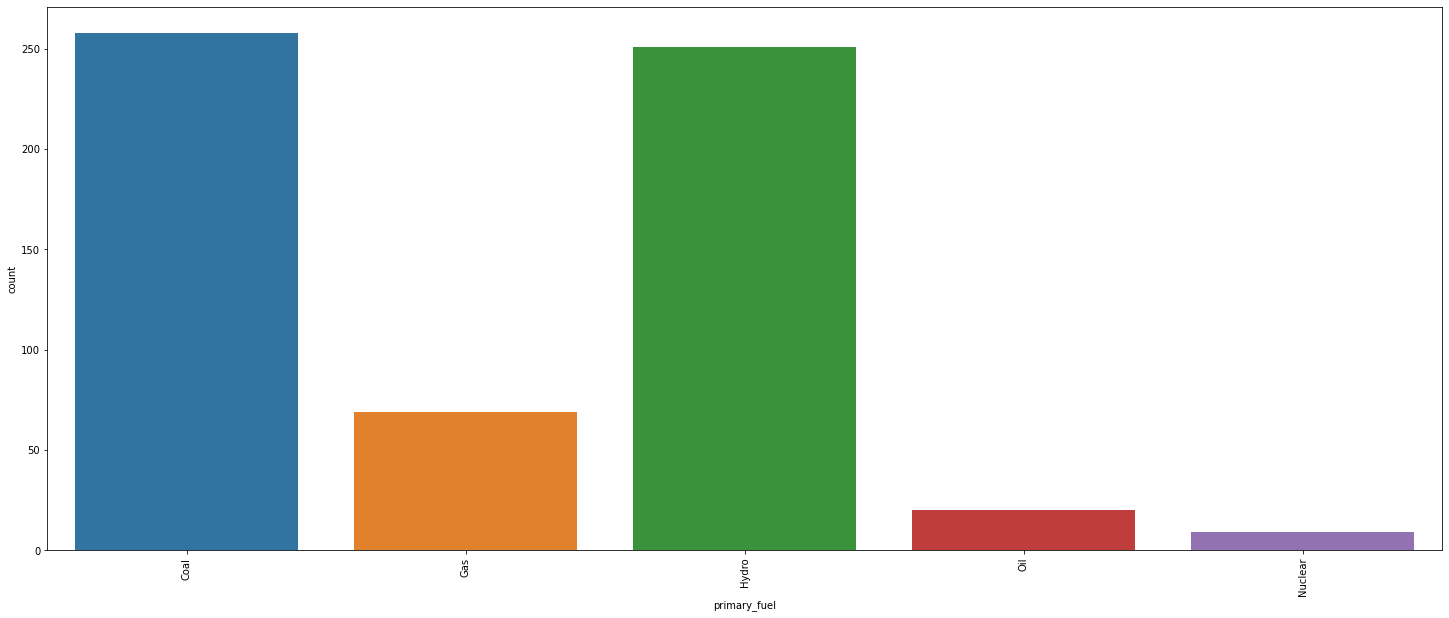

In [95]:
#plotting countplot
plt.figure(figsize=(25,10))
sns.countplot(x='primary_fuel',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the plants are using coal as primary fuel followed by hydro,gas,oil and lastly nuclear.**

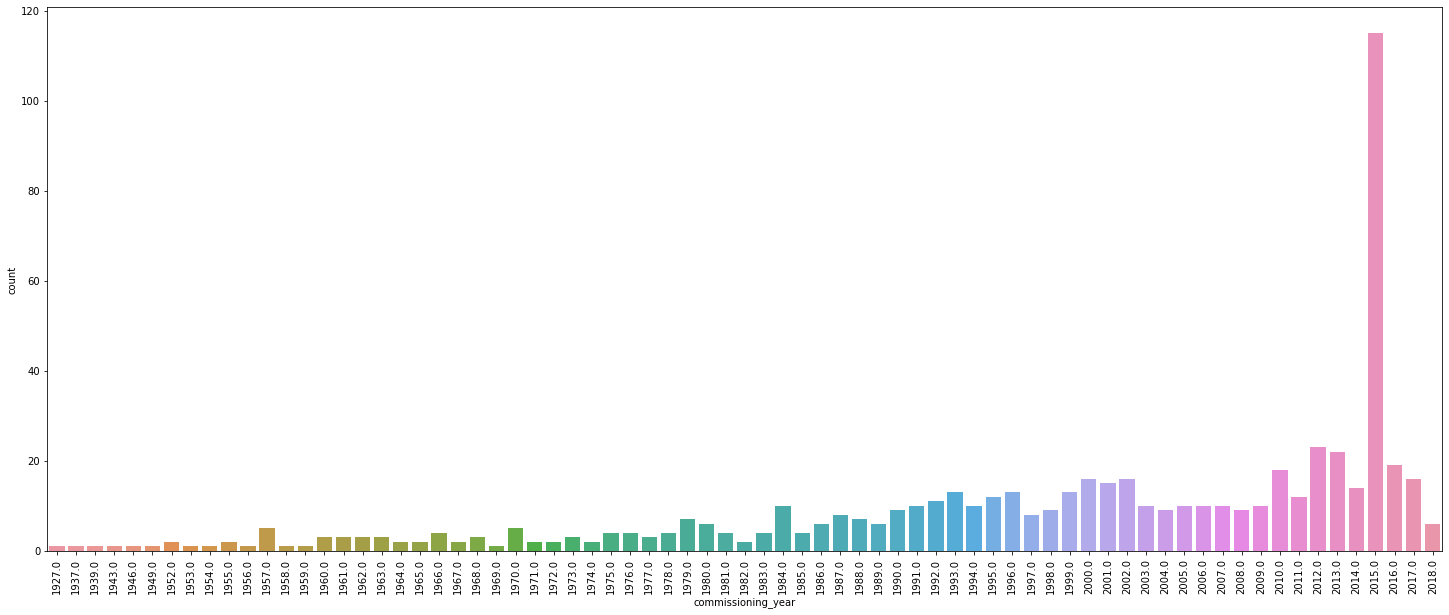

In [96]:
#plotting countplot
plt.figure(figsize=(25,10))
sns.countplot(x='commissioning_year',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the plants were operated in year 2015.**

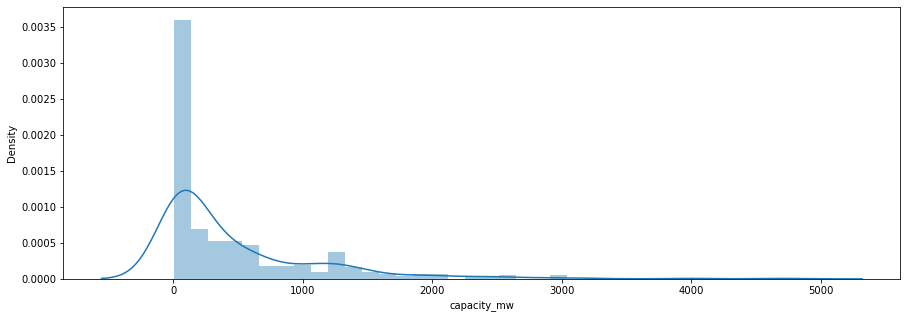

In [97]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['capacity_mw'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and may be outliers would be present.**

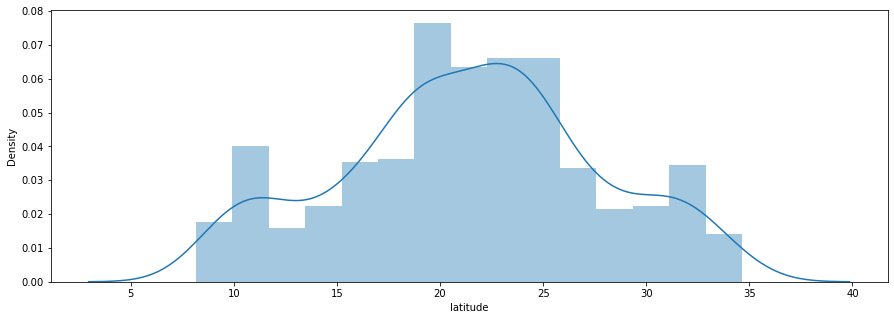

In [98]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['latitude'],kde=True)
plt.show()

**In this plot we can see that skewness is not present, and data is also normally distributed.**

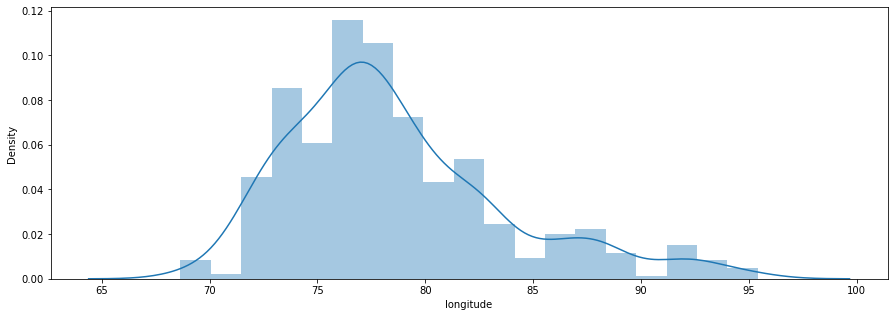

In [99]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['longitude'],kde=True)
plt.show()

**In this plot we can see slight skewnees and data is normally distributed.**

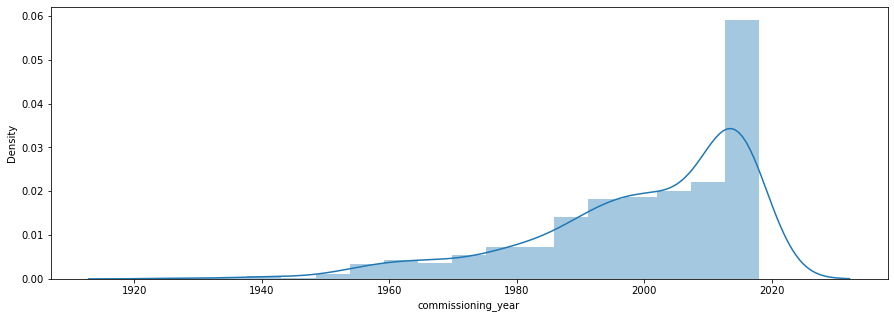

In [100]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['commissioning_year'],kde=True)
plt.show()

**In this plot we can see skewness is present and data is be seeen normally distributed.**

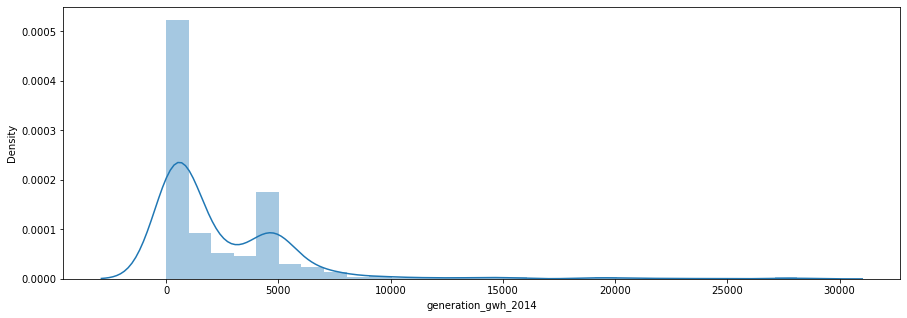

In [101]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['generation_gwh_2014'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and outliers would be present.**

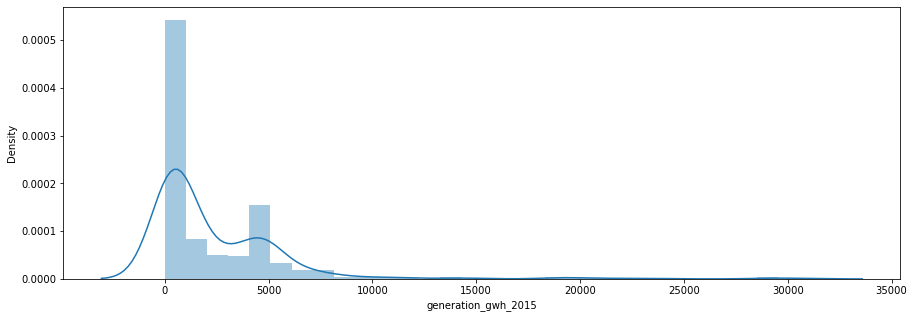

In [102]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['generation_gwh_2015'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and outliers would be present.**

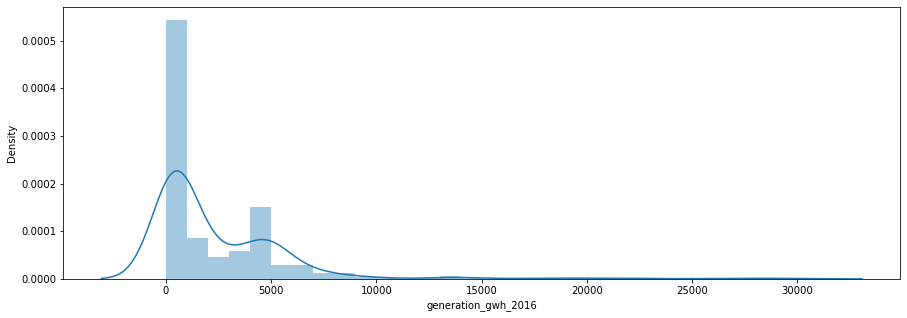

In [103]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['generation_gwh_2016'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and outliers would be present.**

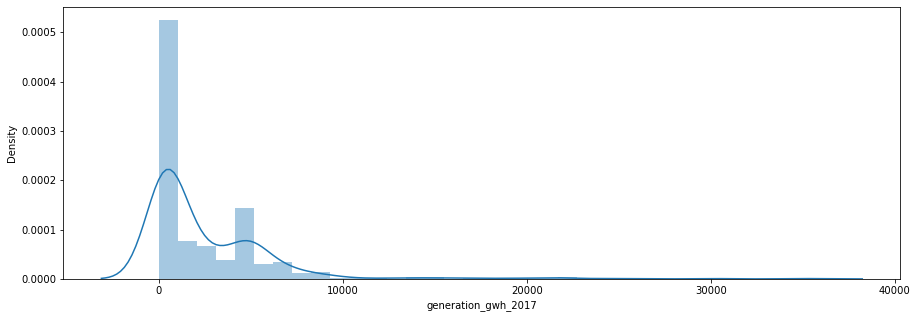

In [104]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['generation_gwh_2017'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and outliers would be present.**

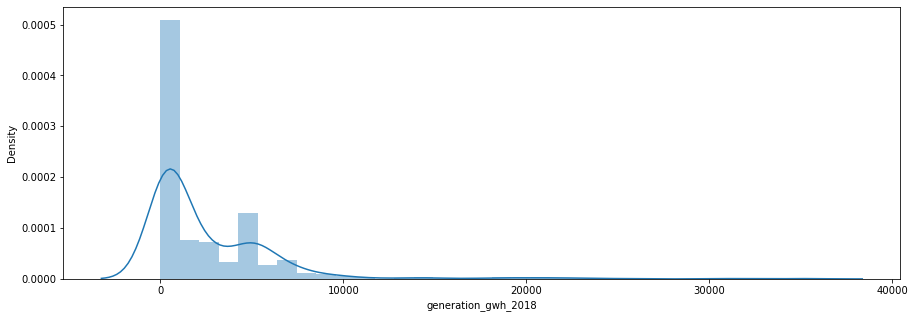

In [105]:
#plotting distribution plot
plt.figure(figsize=(15,5))
sns.distplot(data['generation_gwh_2018'],kde=True)
plt.show()

**In this plot we can see that skewness is present and data is not normally distributed and outliers would be present.**

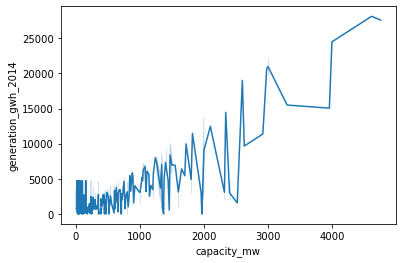

In [106]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='generation_gwh_2014',data=data)
plt.show()

**In this plot we can see that as the electrical generating capacity increases, the electricity genration also increases that is in year 2014.**

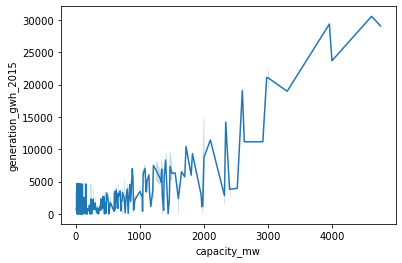

In [107]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='generation_gwh_2015',data=data)
plt.show()

**In this plot we can see that as the electrical generating capacity increases, the electricity genration also increases that is in year 2015.**

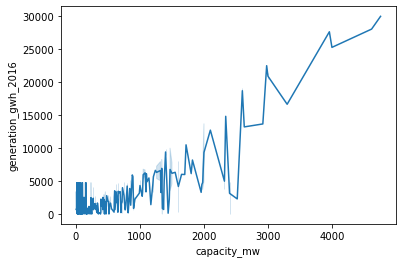

In [108]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='generation_gwh_2016',data=data)
plt.show()

**In this plot we can see that as the electrical generating capacity increases, the electricity genration also increases that is in year 2016.**

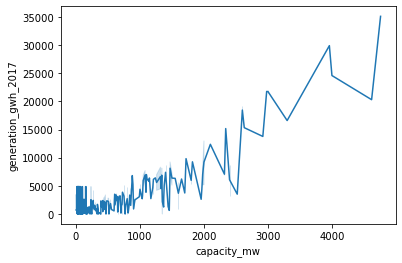

In [109]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see that as the electrical generating capacity increases, the electricity genration also increases that is in year 2017.**

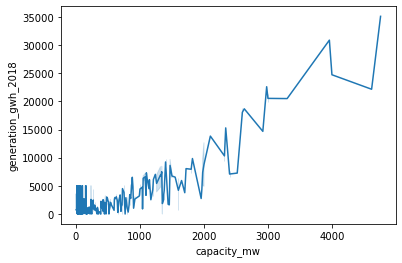

In [110]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see that as the electrical generating capacity increases, the electricity genration also increases that is in year 2018.**

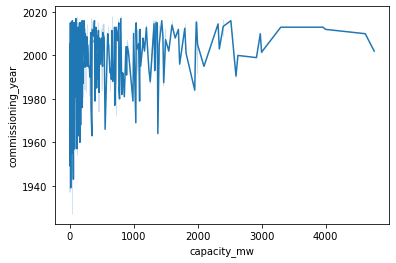

In [111]:
#plotting lineplot
sns.lineplot(x='capacity_mw',y='commissioning_year',data=data)
plt.show()

**In this plot we can see the eletcrical generating capacity as per to the year of plant operation.**

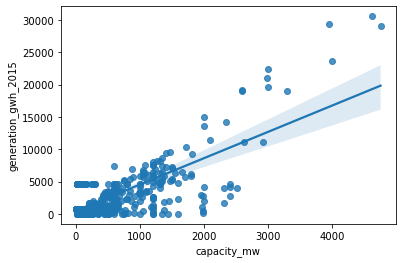

In [123]:
#plotting regression plot
sns.regplot(x='capacity_mw',y='generation_gwh_2015',data=data)
plt.show()

**In this plot we can see a positive trend that means asthe electrical generating capacity increases, the electricity genration also increases.**

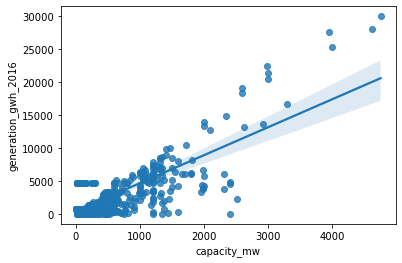

In [124]:
#plotting regression plot
sns.regplot(x='capacity_mw',y='generation_gwh_2016',data=data)
plt.show()

**In this plot we can see a positive trend that means asthe electrical generating capacity increases, the electricity genration also increases.**

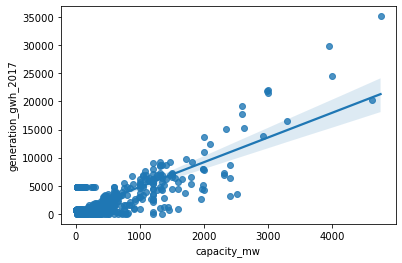

In [125]:
#plotting regression plot
sns.regplot(x='capacity_mw',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see a positive trend that means asthe electrical generating capacity increases, the electricity genration also increases.**

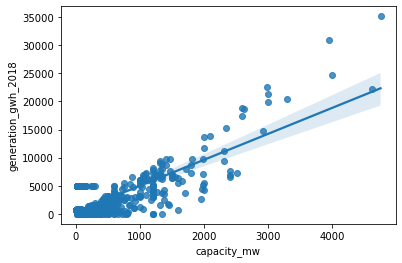

In [126]:
#plotting regression plot
sns.regplot(x='capacity_mw',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see a positive trend that means asthe electrical generating capacity increases, the electricity genration also increases.**

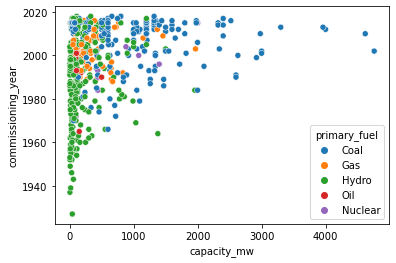

In [128]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='commissioning_year',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that from year 1940 to 2000 when electrical genrating capacity was between 0 to 1000 most of the time hydro was used as a primary fuel.from 2000 to 2020 when electrical generating capacity was between 0 to 1000 most of the time coal and gas was used.And from 1980 to 2020, when the electrical generating capacity is between 1000 to 4000 mot of the time coal is used as primary fuel.**

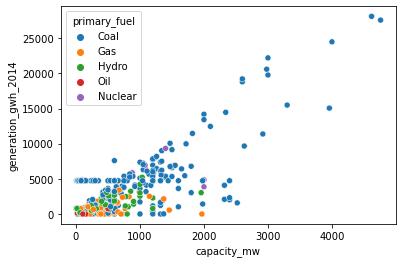

In [129]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that most of the time coal was used as primary fuel when the electrical genearting capacity was more than 1000mw.**

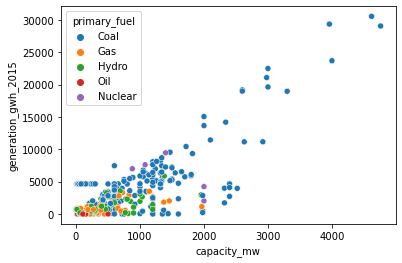

In [130]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that most of the time coal was used as primary fuel when the electrical genearting capacity was more than 1000mw.**

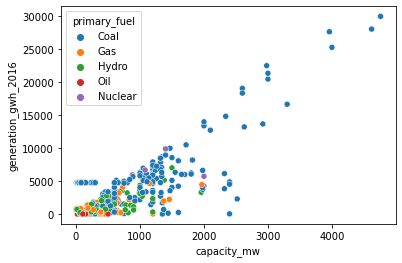

In [131]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that most of the time coal was used as primary fuel when the electrical genearting capacity was more than 1000mw.**

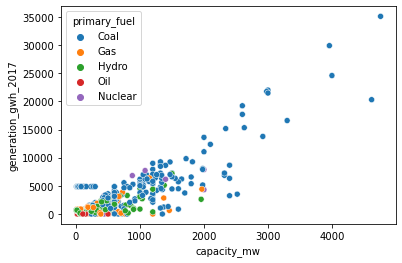

In [132]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that most of the time coal was used as primary fuel when the electrical genearting capacity was more than 1000mw.**

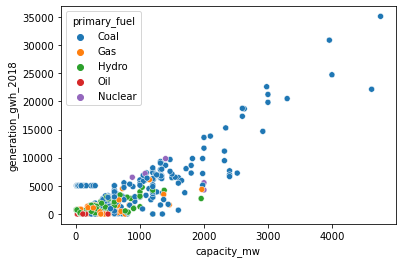

In [133]:
#plotting scatter plot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see that most of the time coal was used as primary fuel when the electrical genearting capacity was more than 1000mw.**

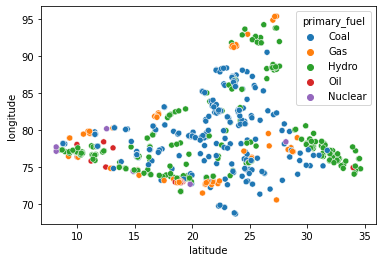

In [139]:
#plotting scatter plot
sns.scatterplot(x='latitude',y='longitude',hue='primary_fuel',data=data)
plt.show()

**In this plot we can see the usage primary fuel according to the latitude and longitude.**

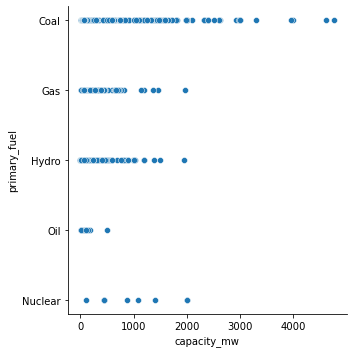

In [140]:
#plotting relation plot
sns.relplot(x='capacity_mw',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when electrical generating capacity is more than 2000mw most of the time coal is used as primary fuel.**

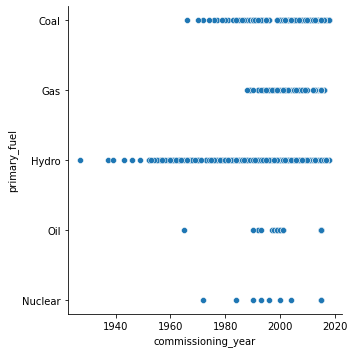

In [141]:
#plotting relation plot
sns.relplot(x='commissioning_year',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that in early years that is from 1940 1960 hydro was used as a primary fuel.**

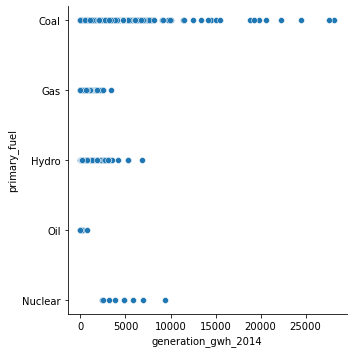

In [142]:
#plotting relation plot
sns.relplot(x='generation_gwh_2014',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when the electricity generation is more than 10000gwh most of the time coal is used as primary fuel.**

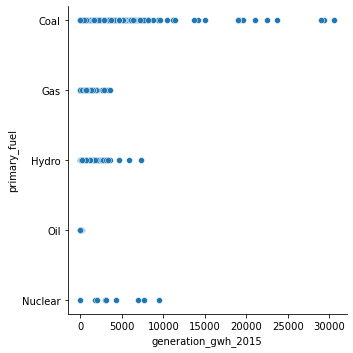

In [143]:
#plotting relation plot
sns.relplot(x='generation_gwh_2015',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when the electricity generation is more than 10000gwh most of the time coal is used as primary fuel.**

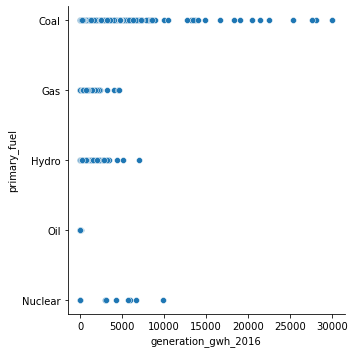

In [144]:
#plotting relation plot
sns.relplot(x='generation_gwh_2016',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when the electricity generation is more than 10000gwh most of the time coal is used as primary fuel.**

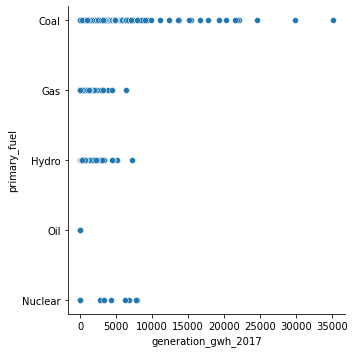

In [145]:
#plotting relation plot
sns.relplot(x='generation_gwh_2017',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when the electricity generation is more than 10000gwh most of the time coal is used as primary fuel.**

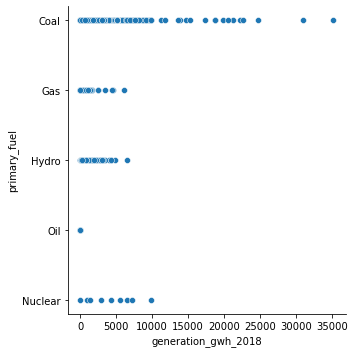

In [146]:
#plotting relation plot
sns.relplot(x='generation_gwh_2018',y='primary_fuel',data=data)
plt.show()

**In this plot we can see that when the electricity generation is more than 10000gwh most of the time coal is used as primary fuel.**

In [147]:
#plotting pie chart

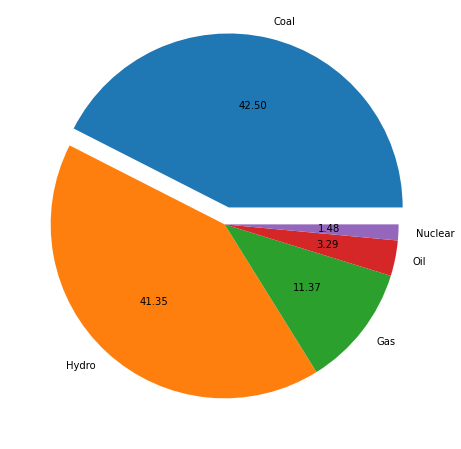

In [148]:
plt.figure(figsize=(8,8))
labels='Coal','Hydro','Gas','Oil','Nuclear'
plt.pie(x=data['primary_fuel'].value_counts(),labels=labels,explode=[0.1,0,0,0,0],autopct='%.2f')
plt.show()

**In this plot we can see that most of the plants are using coal as primary fuel followed by Hydro,gas,oil and lastly Nuclear.**

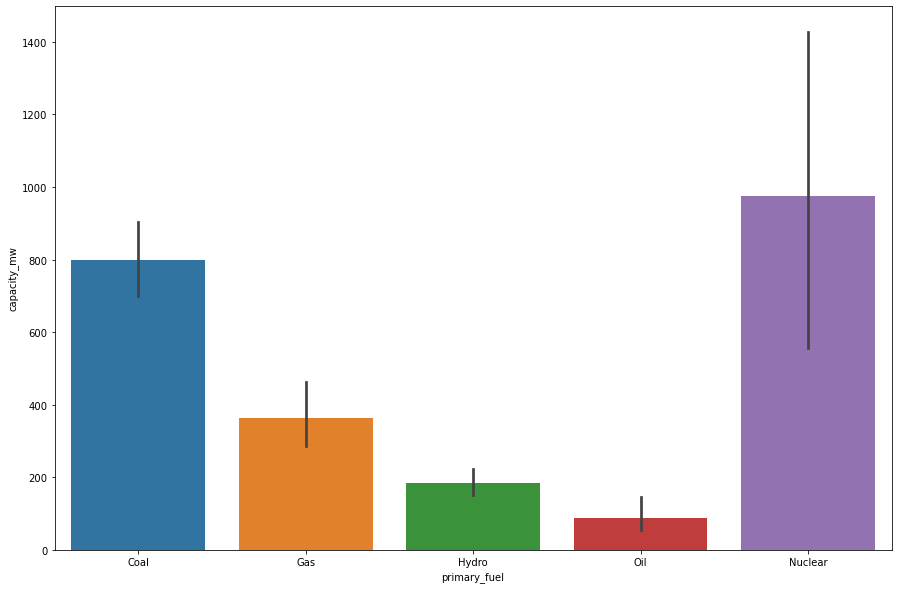

In [149]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='capacity_mw',data=data)
plt.show()

**In this plot we can see the uses of primary fuel as per the electrical genearting capacity.**

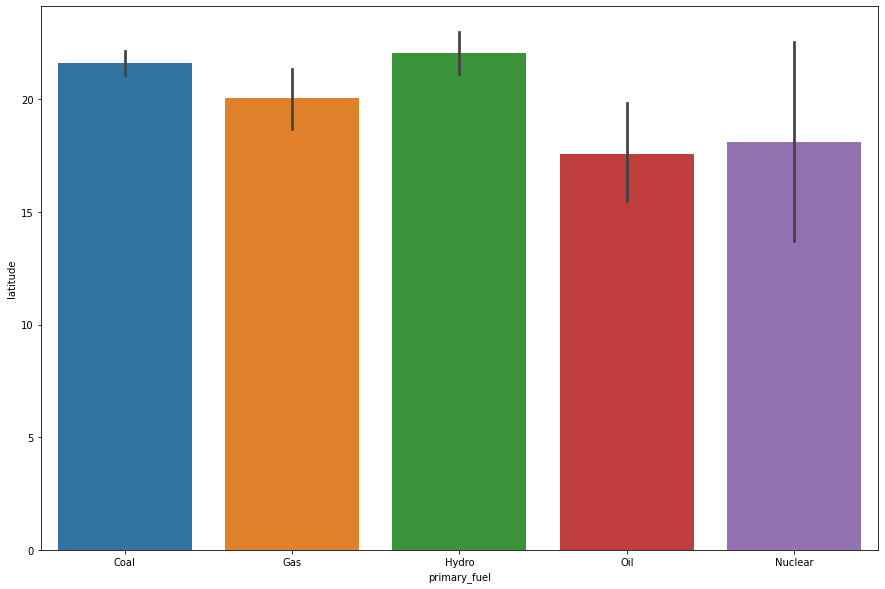

In [150]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='latitude',data=data)
plt.show()

**In this plot we can see the uses of primary fuel as per the latitude.**

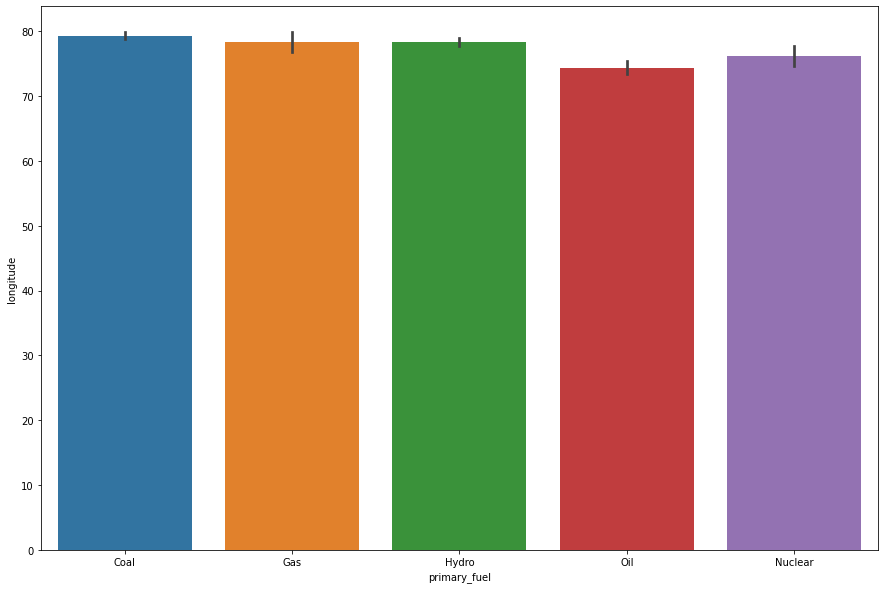

In [151]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='longitude',data=data)
plt.show()

**In this plot we can see the uses of primary fuel as per the longitude.**

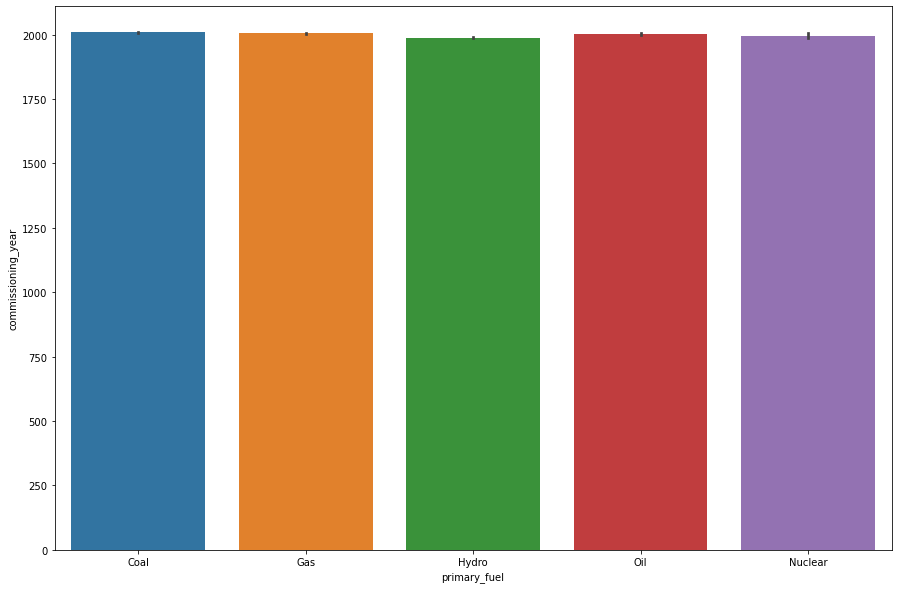

In [152]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='commissioning_year',data=data)
plt.show()

**In this plot we can see the uses of primary fuel as per the plant year of plant opeartion.**

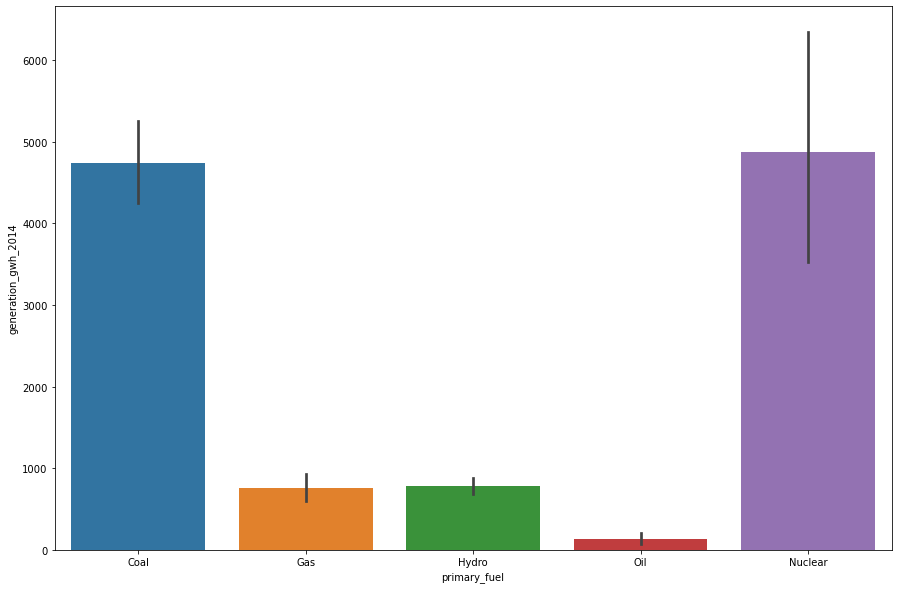

In [153]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=data)
plt.show()

**In this plot we can see that most of the times when electricity generation was between 1000gwh to 4000gwh coal and nulcear were used as primary fuel.**

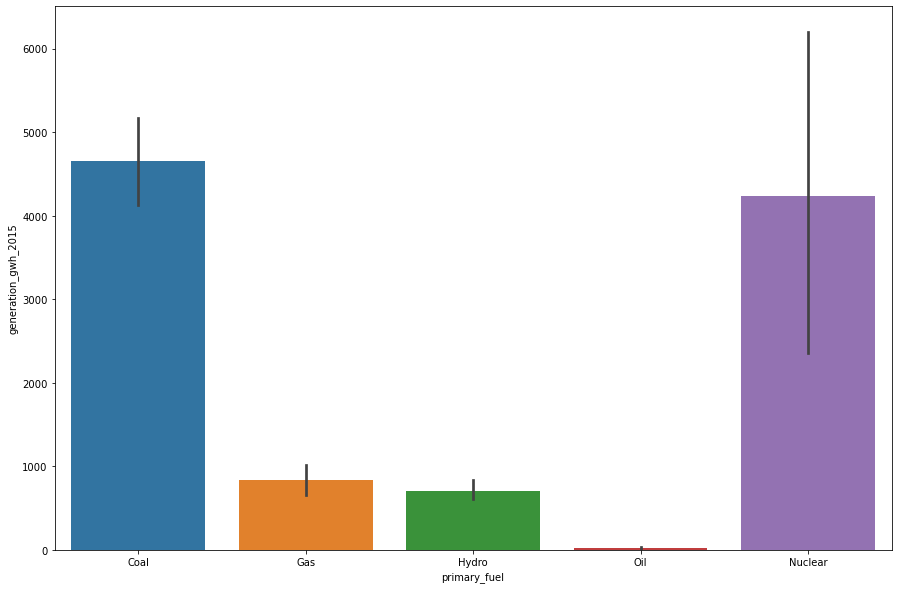

In [154]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=data)
plt.show()

**In this plot we can see that most of the times when electricity generation was between 1000gwh to 4000gwh coal and nulcear were used as primary fuel.**

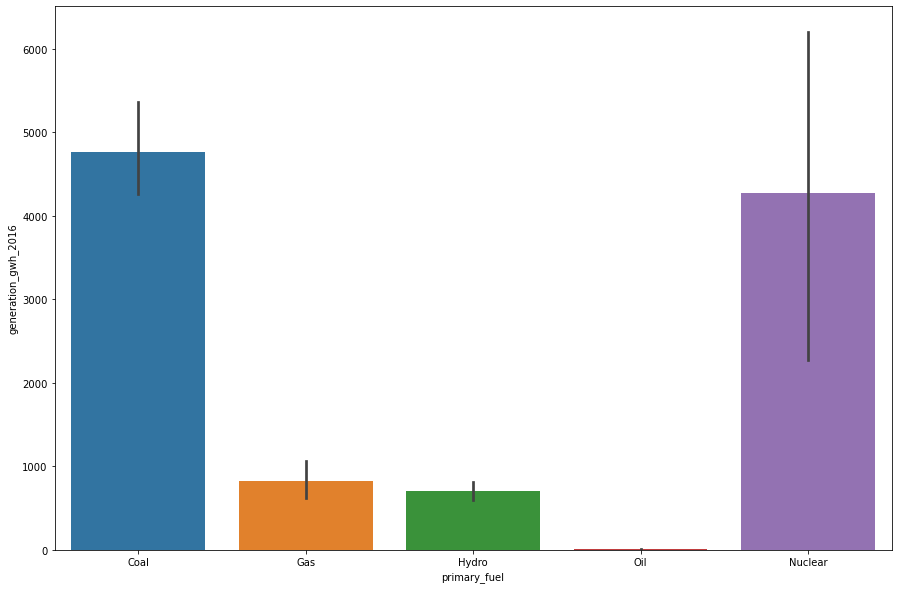

In [155]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=data)
plt.show()

**In this plot we can see that most of the times when electricity generation was between 1000gwh to 4000gwh coal and nulcear were used as primary fuel.**

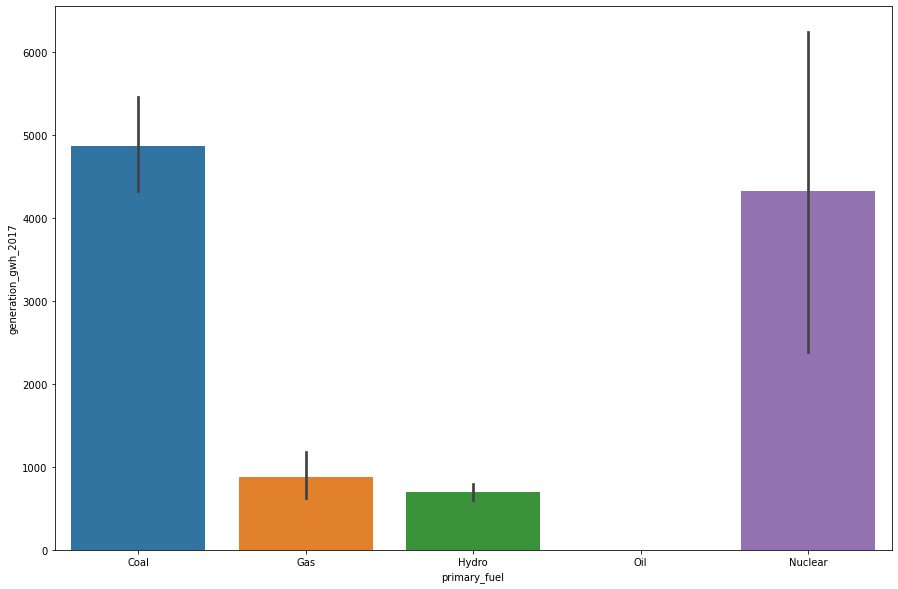

In [156]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see that most of the times when electricity generation was between 1000gwh to 4000gwh coal and nulcear were used as primary fuel.**

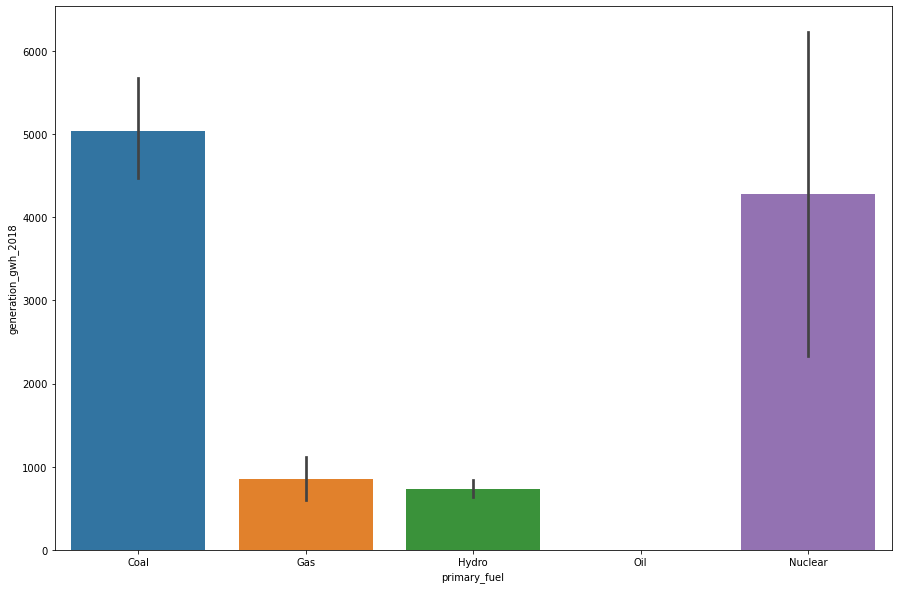

In [157]:
#plotting barplot
plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see that most of the times when electricity generation was between 1000gwh to 4000gwh coal and nulcear were used as primary fuel.**

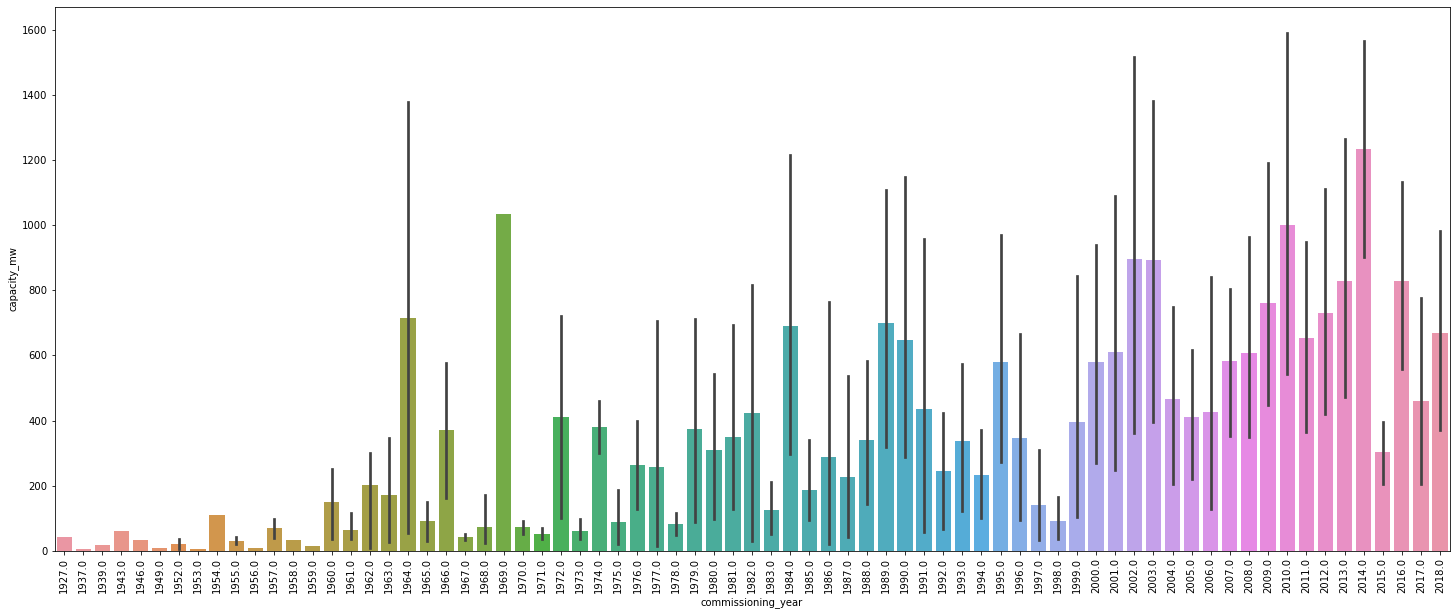

In [158]:
#plotting barplot
plt.figure(figsize=(25,10))
sns.barplot(x='commissioning_year',y='capacity_mw',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that in year 2014 electrical generation capacity was the highest that is more than 1200mw.**

In [166]:
#changing the year to age
data['Age']=2022-data['commissioning_year']

In [167]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,Coal,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,Coal,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
...,...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,Hydro,1991.0,184.453100,183.000000,204.253600,175.866250,236.491600,31.0
899,600.0,30.1081,77.3257,Coal,2007.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180,15.0
901,106.6,13.1156,77.5838,Oil,1993.0,0.000000,0.000000,0.000000,0.167471,0.000000,29.0
902,1600.0,16.2949,77.3568,Coal,2016.0,4737.279310,0.994875,233.596650,865.400000,686.500000,6.0


**So we can see that new column age have been added to dataset which is the years completed for the plant.**

In [168]:
#dropping column commissioning year
data=data.drop(['commissioning_year'],axis=1)
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,Coal,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,Coal,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,Hydro,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,Hydro,184.453100,183.000000,204.253600,175.866250,236.491600,31.0
899,600.0,30.1081,77.3257,Coal,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180,15.0
901,106.6,13.1156,77.5838,Oil,0.000000,0.000000,0.000000,0.167471,0.000000,29.0
902,1600.0,16.2949,77.3568,Coal,4737.279310,0.994875,233.596650,865.400000,686.500000,6.0


In [169]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [170]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['primary_fuel'])

In [171]:
#Transfering the data 
data['primary_fuel']=df1

In [172]:
#Checking whether the data is encoded or not
data.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,1,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,2,157.558250,152.195200,61.421350,89.629600,48.327150,52.0


**so we can see that column primary fuel have been encoded.**

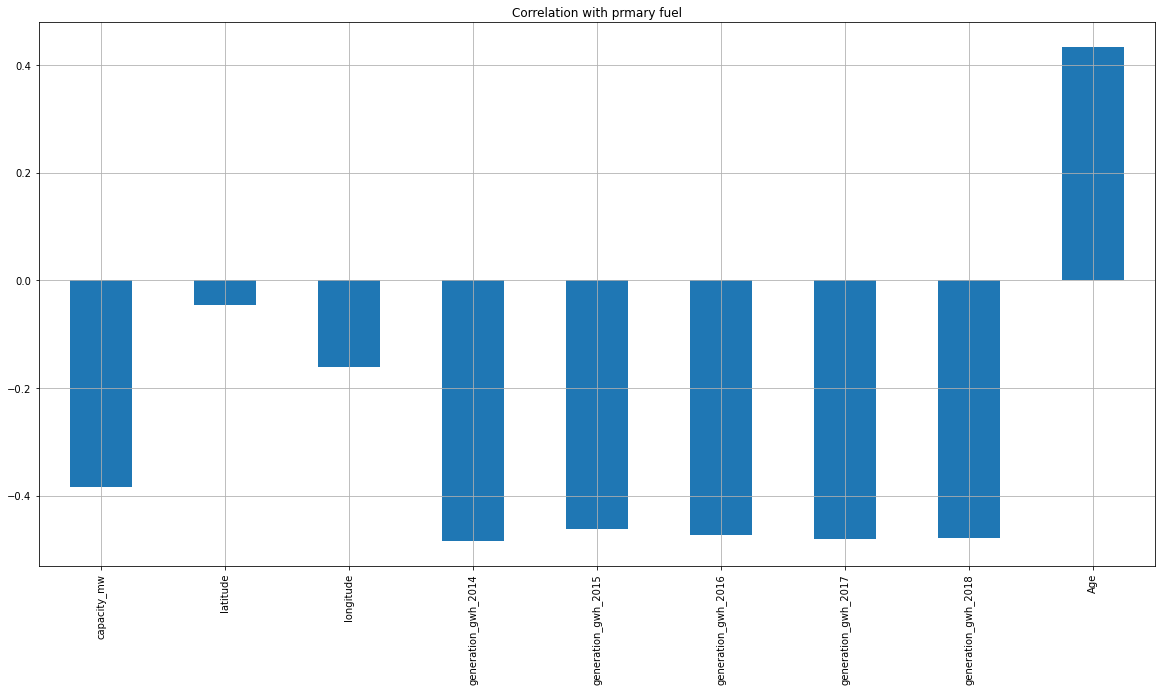

In [173]:
#Checking for correlation
data.drop(['primary_fuel'],axis=1).corrwith(data['primary_fuel']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with prmary fuel')
plt.show()

**In this plot we can see that almost all the features are highly correlated with primary fuel that is the label except column latitude and longitude.**

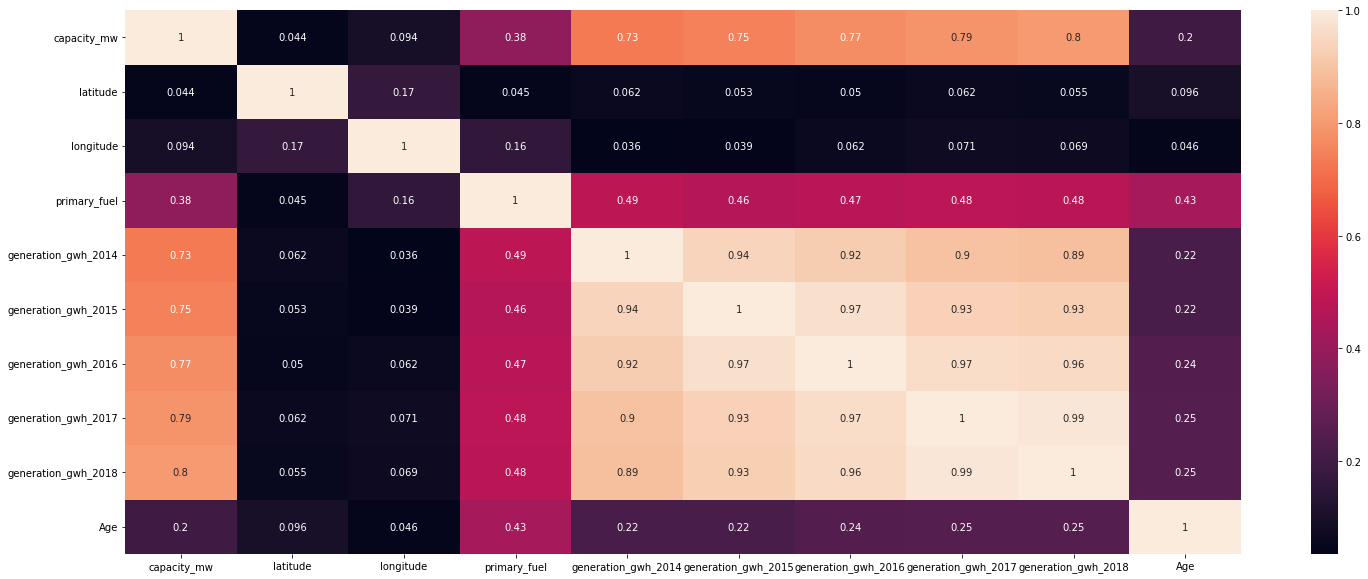

In [174]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this we can see that column capacity_mw is multicorrelated with generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018.**
* **Also we can see that column generation_gwh_2014,generation_gwh_2015 generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 are multicorrelated with each other.**
* **so further i will plot scatterplot to check the trend.**

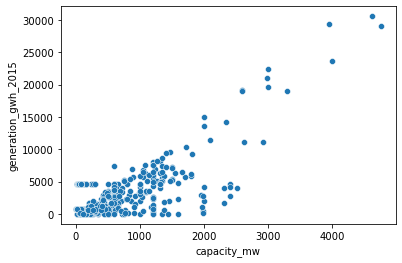

In [175]:
#plotting scatterllot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

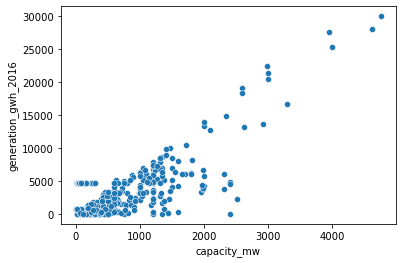

In [176]:
#plotting scatterllot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

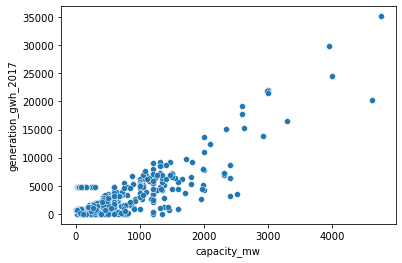

In [177]:
#plotting scatterllot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

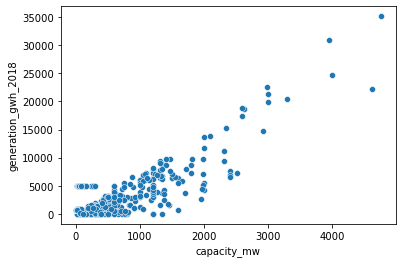

In [178]:
#plotting scatterllot
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

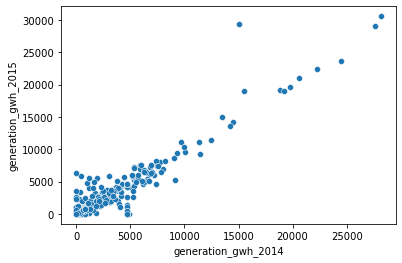

In [179]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2015',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

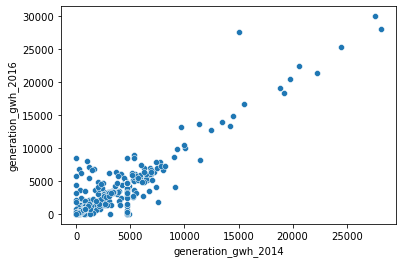

In [180]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2016',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

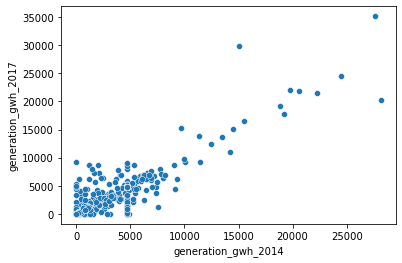

In [181]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

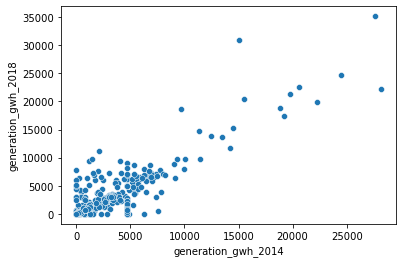

In [182]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

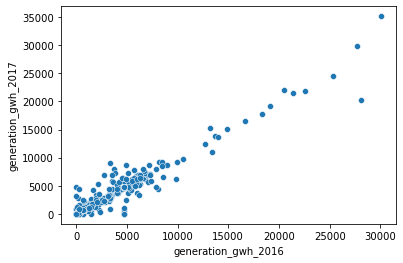

In [183]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2016',y='generation_gwh_2017',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

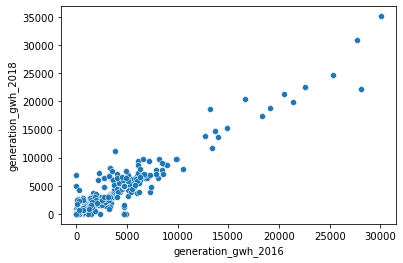

In [184]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2016',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

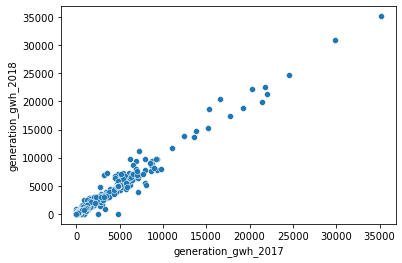

In [185]:
#plotting scatterllot
sns.scatterplot(x='generation_gwh_2017',y='generation_gwh_2018',data=data)
plt.show()

**In this plot we can see a positive trend, so that means they are multicorrelated.but i will confirm this after using vif method.**

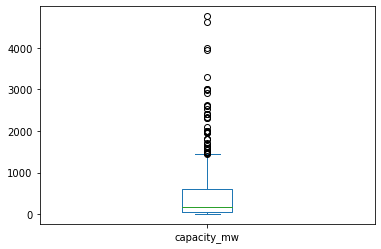

In [186]:
#Checking for outliers
data['capacity_mw'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

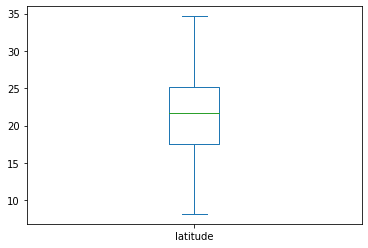

In [187]:
#Checking for outliers
data['latitude'].plot.box()
plt.show()

**In this plot we can see that outliers are not present.**

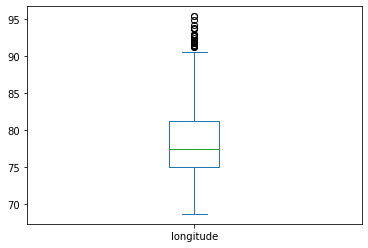

In [188]:
#Checking for outliers
data['longitude'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

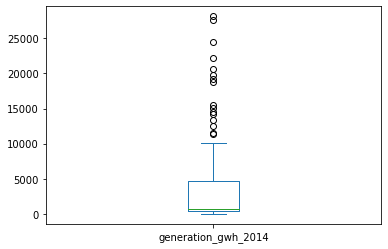

In [189]:
#Checking for outliers
data['generation_gwh_2014'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

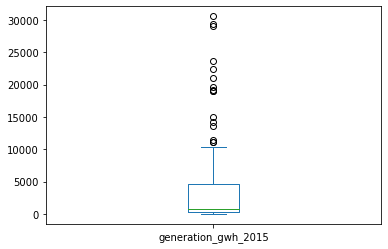

In [190]:
#Checking for outliers
data['generation_gwh_2015'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

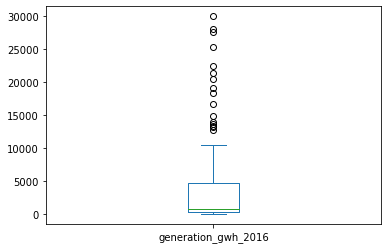

In [191]:
#Checking for outliers
data['generation_gwh_2016'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

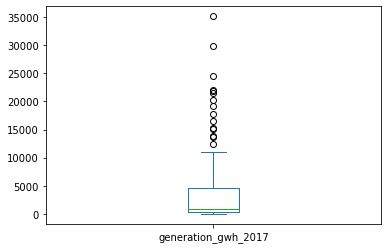

In [192]:
#Checking for outliers
data['generation_gwh_2017'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

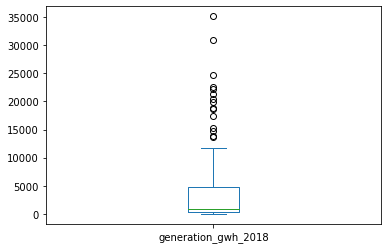

In [193]:
#Checking for outliers
data['generation_gwh_2018'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

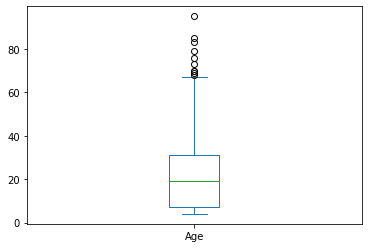

In [194]:
#Checking for outliers
data['Age'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

In [195]:
#Importing required libraries
from scipy.stats import zscore

In [196]:
#Removing outliers
z_score=zscore(data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [197]:
data=data[z]

In [198]:
data.shape

(582, 10)

In [199]:
#Percentage Loss of Data
data_loss=((607-582)/607)*100
print(f'Data Loss:{data_loss} %')

Data Loss:4.118616144975288 %


In [200]:
#checking skewness
data.skew()

capacity_mw            1.589799
latitude              -0.039478
longitude              0.970613
primary_fuel           0.431572
generation_gwh_2014    1.175875
generation_gwh_2015    1.175316
generation_gwh_2016    1.193725
generation_gwh_2017    1.149758
generation_gwh_2018    1.241028
Age                    1.032662
dtype: float64

**In this we can see that in column capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 skewness is present.so by using power transform method i will try to treat the skewness.**

In [201]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [202]:
#using power transform method
data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']],method='yeo-johnson')
data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,-0.332452,-0.783407,1.142148,1.157613,1.151839,1.139273,1.143537
3,-0.137166,2.013313,-0.411478,-0.125342,-0.090753,-0.245315,-0.289474
4,1.651620,0.938470,0.722774,1.389210,1.407168,1.229854,1.487012
5,0.254116,-3.057343,-0.026183,0.099619,0.082635,0.066989,-0.045190
6,-0.620818,-0.139871,-1.050668,-0.948746,-1.229213,-1.072604,-1.258247
...,...,...,...,...,...,...,...
893,-0.598247,-0.006207,-0.988973,-0.876875,-0.812431,-0.841002,-0.735768
899,0.846057,-0.063358,0.768199,0.953325,0.788290,0.774248,0.722672
901,-0.281703,-0.002616,-2.089798,-2.022669,-1.992203,-1.901164,-1.921031
902,1.561772,-0.055974,1.142148,-1.944521,-0.757199,-0.099623,-0.241250


In [203]:
#checking skewness
data.skew()

capacity_mw           -0.046674
latitude              -0.039478
longitude              0.042392
primary_fuel           0.431572
generation_gwh_2014   -0.161881
generation_gwh_2015   -0.172072
generation_gwh_2016   -0.179402
generation_gwh_2017   -0.205475
generation_gwh_2018   -0.199188
Age                    1.032662
dtype: float64

**So we can see that skewness have been removed.**

In [204]:
#Dividing dataset into features and label
#Features
x=data.drop(['primary_fuel'],axis=1)
#Label
y=data['primary_fuel']

In [205]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-0.3324517 ,  0.53018434, -0.78340793, ...,  1.13927271,
         1.14353731, -0.92290279],
       [-0.13716645,  0.38805826,  2.01331226, ..., -0.24531457,
        -0.28947412, -0.25011485],
       [ 1.65161999,  0.08464108,  0.93846908, ...,  1.22985379,
         1.48701228, -0.92290279],
       ...,
       [-0.28170342, -1.31974111, -0.00261642, ..., -1.90116401,
        -1.9210308 ,  0.42267308],
       [ 1.56177196, -0.8149244 , -0.05597464, ..., -0.09962257,
        -0.24125045, -0.98406533],
       [-0.45331544,  0.46408325, -1.0463334 , ...,  1.13927271,
         1.14353731, -0.92290279]])

In [206]:
x_scaler.shape

(582, 9)

In [207]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.228296,capacity_mw
1,1.033764,latitude
2,1.069544,longitude
3,3.429191,generation_gwh_2014
4,6.336233,generation_gwh_2015
5,10.608067,generation_gwh_2016
6,14.381328,generation_gwh_2017
7,12.428481,generation_gwh_2018
8,1.121973,Age


**In this we can see that column generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 are having vif value more than 5.so we cant drop all the 4 features so dropping column which is less correlated to the label.**
**So as we can see in the above heatmap is that column generation_gwh_2015 is less correlated to the primary fuel among the others that is why iam dropping this column.**

In [209]:
#Dividing dataset into features and label
#Features
x_scaler=data.drop(['primary_fuel','generation_gwh_2015'],axis=1)
#Label
y=data['primary_fuel']

In [210]:
#checking value counts of the label
data.primary_fuel.value_counts()

2    245
0    242
1     66
4     20
3      9
Name: primary_fuel, dtype: int64

**so we can see that data is imbalance.so using smote technique to balance the data.**

In [211]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [212]:
over_samp=SMOTE()

In [213]:
x_new,y_new=over_samp.fit_resample(x_scaler,y)

In [214]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 2    245
0    242
1     66
4     20
3      9
Name: primary_fuel, dtype: int64


In [215]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    245
1    245
2    245
4    245
3    245
Name: primary_fuel, dtype: int64


**I am not using feature selection method since there are few features left in the dataset.so iam connsidering all the features.**

In [314]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

**Logistic Regression**

In [315]:
#instantiating the model
rfc=RandomForestClassifier()

In [316]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_train)
    y_pred=rfc.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:100.0
at random state0,the testing accuracy is:91.85667752442997


at random state1,the training accuracy is:100.0
at random state1,the testing accuracy is:93.48534201954396


at random state2,the training accuracy is:100.0
at random state2,the testing accuracy is:92.83387622149837


at random state3,the training accuracy is:100.0
at random state3,the testing accuracy is:91.85667752442997


at random state4,the training accuracy is:100.0
at random state4,the testing accuracy is:94.78827361563518


at random state5,the training accuracy is:100.0
at random state5,the testing accuracy is:91.20521172638436


at random state6,the training accuracy is:100.0
at random state6,the testing accuracy is:92.50814332247556


at random state7,the training accuracy is:100.0
at random state7,the testing accuracy is:90.87947882736157


at random state8,the training accuracy is:100.0
at random state8,the testing accuracy is:93.15960912052117


at random state9,th

**Taking random state=19.**

In [358]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=19)

In [359]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [360]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [361]:
#calling the function and passing the dataset for Random forest
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:95.11%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.91      0.92      0.92        65
           2       0.96      0.94      0.95        47
           3       1.00      1.00      1.00        67
           4       0.96      1.00      0.98        77

    accuracy                           0.95       307
   macro avg       0.95      0.94      0.95       307
weighted avg       0.95      0.95      0.95       307


 Confusion Matrix:
 [[44  5  1  0  1]
 [ 2 60  1  0  2]
 [ 2  1 44  0  0]
 [ 0  0  0 67  0]
 [ 0  0  0  0 77]]

 F1 Score:
 0.9511400651465798


In [362]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [363]:
y_pred=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [364]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(rfc,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.9110236808154475and accuracy for the testing is 0.9511400651465798


at cross fold 3 the cv score is0.9257155184812311and accuracy for the testing is 0.9511400651465798


at cross fold 4 the cv score is0.9249084541525623and accuracy for the testing is 0.9511400651465798


at cross fold 5 the cv score is0.9257142857142858and accuracy for the testing is 0.9511400651465798




**Taking cv=5.**

In [270]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [271]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.32644628 0.58264463 0.73140496 0.78512397 1.        ]
TPR [0.         0.03076923 0.03076923 0.15384615 0.93846154 1.        ]
Threshold [5 4 3 2 1 0]


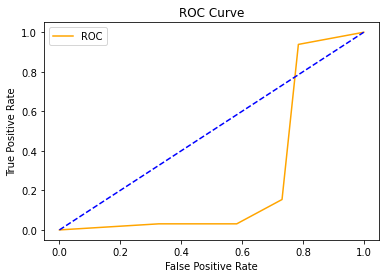

In [272]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [273]:
#Initiating Gradient Boosting classifier
gb=GradientBoostingClassifier()

In [274]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=19)

In [275]:
#Training the data
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [276]:
#calling the function and passing the dataset for logistic regression
metric_score(gb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(gb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:94.79%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.94      0.95      0.95        65
           2       0.95      0.87      0.91        47
           3       0.96      0.99      0.97        67
           4       0.97      1.00      0.99        77

    accuracy                           0.95       307
   macro avg       0.94      0.94      0.94       307
weighted avg       0.95      0.95      0.95       307


 Confusion Matrix:
 [[45  3  1  1  1]
 [ 2 62  1  0  0]
 [ 2  1 41  2  1]
 [ 1  0  0 66  0]
 [ 0  0  0  0 77]]

 F1 Score:
 0.9478827361563518


In [277]:
#Checking cross validation score
cv_score=cross_val_score(gb,x_new,y_new,cv=5).mean()
cv_score

0.9248979591836735

In [278]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [279]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.32644628 0.58264463 0.73140496 0.78512397 1.        ]
TPR [0.         0.03076923 0.03076923 0.15384615 0.93846154 1.        ]
Threshold [5 4 3 2 1 0]


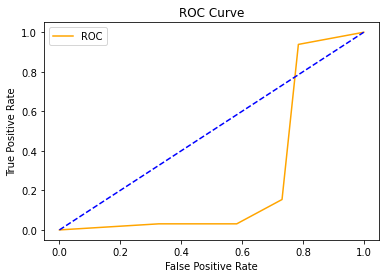

In [280]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [281]:
#Initiating Gradient Boosting classifier
ada=AdaBoostClassifier()

In [282]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=19)

In [283]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [284]:
#calling the function and passing the dataset for logistic regression
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:55.12%

=====Test Score=====
Accuracy Score:62.54%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.04      0.06        51
           1       0.62      0.85      0.72        65
           2       0.25      0.09      0.13        47
           3       0.57      0.81      0.67        67
           4       0.89      1.00      0.94        77

    accuracy                           0.63       307
   macro avg       0.48      0.56      0.50       307
weighted avg       0.53      0.63      0.56       307


 Confusion Matrix:
 [[ 2  7  0 40  2]
 [ 1 55  1  0  8]
 [16 26  4  1  0]
 [ 2  0 11 54  0]
 [ 0  0  0  0 77]]

 F1 Score:
 0.6254071661237784


In [285]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=5).mean()
cv_score

0.49142857142857144

In [286]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [287]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.32644628 0.58264463 0.73140496 0.78512397 1.        ]
TPR [0.         0.03076923 0.03076923 0.15384615 0.93846154 1.        ]
Threshold [5 4 3 2 1 0]


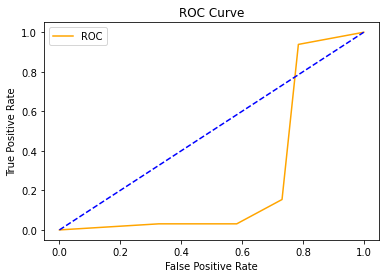

In [288]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support Vector Machine**

In [289]:
#instantiating the model
svc=SVC()

In [290]:
#training,testing and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=19)

In [291]:
#training the data
svc.fit(x_train,y_train)

SVC()

In [292]:
#calling the function and passing the dataset for logistic regression
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


=====Train Score=====
Accuracy Score:71.24%

=====Test Score=====
Accuracy Score:75.57%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        51
           1       0.70      0.48      0.57        65
           2       0.69      0.62      0.65        47
           3       0.77      0.96      0.85        67
           4       0.82      0.92      0.87        77

    accuracy                           0.76       307
   macro avg       0.74      0.74      0.73       307
weighted avg       0.75      0.76      0.74       307


 Confusion Matrix:
 [[37  5  3  5  1]
 [10 31  3 10 11]
 [ 4  8 29  2  4]
 [ 0  0  3 64  0]
 [ 0  0  4  2 71]]

 F1 Score:
 0.7557003257328991


In [293]:
#checking cross validation score
cv_score=cross_val_score(svc,x_new,y_new,cv=5).mean()
cv_score

0.7281632653061225

In [294]:
#plotting roc curve
fprate,tprate,threshold=roc_curve(y_test,y_pred,pos_label=1)

In [295]:
print('FPR',fprate)
print('TPR',tprate)
print('Threshold',threshold)

FPR [0.         0.32644628 0.58264463 0.73140496 0.78512397 1.        ]
TPR [0.         0.03076923 0.03076923 0.15384615 0.93846154 1.        ]
Threshold [5 4 3 2 1 0]


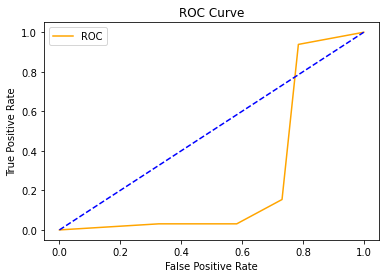

In [296]:
plt.plot(fprate,tprate,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [365]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Random Forest','Gradient Boosting','Ada','SVC'],
    'Training Score':[100,100,55.12,71.24],
    'Testing Score':[95.11,94.79,62.54,75.57],
    'Cross Val Score':[92.57,92.48,49.14,72.81],
    'F1 score':[95.11,94.78,62.54,75.57]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Random Forest,100.00,95.11,92.57,95.11
1,Gradient Boosting,100.00,94.79,92.48,94.78
2,Ada,55.12,62.54,49.14,62.54
3,SVC,71.24,75.57,72.81,75.57


**Observation**
* **In this we can see that Random forest and gradient boosting have seen most most of the data.**
* **GoiNG forward Random forest have the highest testing score,cross validation score and f1-score is very close to the testing score and the difference between the testing score and training score is less as compared to the other models.**
* **So i would like to go forward with Random Forest.**

In [366]:
#Using Grid Search cv for hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

In [367]:
param_grid=({
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['gini', 'entropy']
})

In [368]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [369]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [370]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [371]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',n_estimators=100)
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [372]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:99.46%

=====Test Score=====
Accuracy Score:93.81%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        51
           1       0.87      0.94      0.90        65
           2       0.98      0.87      0.92        47
           3       0.96      1.00      0.98        67
           4       0.96      1.00      0.98        77

    accuracy                           0.94       307
   macro avg       0.94      0.93      0.93       307
weighted avg       0.94      0.94      0.94       307


 Confusion Matrix:
 [[42  7  0  1  1]
 [ 2 61  1  0  1]
 [ 1  2 41  2  1]
 [ 0  0  0 67  0]
 [ 0  0  0  0 77]]

 F1 Score:
 0.9381107491856677


* **In this we can see that after doing hyperparameter tuning the training,testing,cross validation and f1_score reduced.So i am not considering this model with hyperparameter tuning.**
* **So i will be saving the model on which hyperparameter tuning was not done.**

In [373]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9175510204081633

In [374]:
y_pred_prob=rfc.predict_proba(x_test)

In [375]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
roc_auc_score

0.9944183235188451

In [376]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Global Power Plant Classification','wb'))

# Prediction for capacity_mw

**As we have already done EDA so i wont be doing the eda part and visualization part.**

**Further i will change the commissioning_year column to Age column.**

**I will encode the data for primary fuel.**

**Further i will check for outliers.if they are present than i will delete them using z-score method.**

**Further i will check for skewnees again and remove it by using power transform method.**

**Will check for multicollinearity and will take further steps.**

In [377]:
#loading dataset
data=pd.read_csv("database_IND.csv")

In [378]:
#first of all dropping the unwanted columns
data=data.drop(['country','country_long','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'],axis=1)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
#checking for null values
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [380]:
#treating the null values
data['latitude']=data['latitude'].fillna(data['latitude'].mode()[0])
data['longitude']=data['longitude'].fillna(data['longitude'].mode()[0])
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])

In [381]:
#checking mean value of capacity genereted in year 2014 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [382]:
#checking mean value of capacity genereted in year 2015 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

In [383]:
#checking mean value of capacity genereted in year 2016 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Biomass            NaN
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Solar              NaN
Wind               NaN
Name: generation_gwh_2016, dtype: float64

In [384]:
#checking mean value of capacity genereted in year 2017 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Biomass            NaN
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Solar              NaN
Wind               NaN
Name: generation_gwh_2017, dtype: float64

In [385]:
#checking mean value of capacity genereted in year 2018 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Biomass            NaN
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Solar              NaN
Wind               NaN
Name: generation_gwh_2018, dtype: float64

**So we can see that in column generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 whenever primary fuel Biomass,solar and wind was used this columns showing null values and simply i cannot put any value using mode in this columns.so i am dropping this rows with primary fuel as Biamass,solar and wind.**

In [386]:
#checnking for value counts
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [387]:
#dropping rows where primary_fuel=Biomass,Solar,wind
data=data.drop(data[data['primary_fuel']=='Solar'].index)
data=data.drop(data[data['primary_fuel']=='Wind'].index)
data=data.drop(data[data['primary_fuel']=='Biomass'].index)

In [388]:
#checnking for value counts
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Gas         69
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

**so we can see that rows with primary fuel as solar,wind and biomass have been dropped.**

In [389]:
#checking mean value of capacity genereted in year 2014 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Name: generation_gwh_2014, dtype: float64

In [390]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2014'].fillna(4737.279310),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2014'].fillna(756.601441),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2014'].fillna(780.429852),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2014'].fillna( 4867.556164),data['generation_gwh_2014'])
data['generation_gwh_2014']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2014'].fillna(130.881366),data['generation_gwh_2014'])

In [391]:
#checking mean value of capacity genereted in year 2015 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Name: generation_gwh_2015, dtype: float64

In [392]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2015'].fillna(4649.585751),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2015'].fillna(840.159648),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2015'].fillna(709.991238),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2015'].fillna( 4234.875000),data['generation_gwh_2015'])
data['generation_gwh_2015']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2015'].fillna(21.710086),data['generation_gwh_2015'])

In [393]:
#checking mean value of capacity genereted in year 2016 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Name: generation_gwh_2016, dtype: float64

In [394]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2016'].fillna(4761.233946),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2016'].fillna(826.305503),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2016'].fillna(699.318079),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2016'].fillna( 4272.608750),data['generation_gwh_2016'])
data['generation_gwh_2016']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2016'].fillna(4.796871),data['generation_gwh_2016'])

In [395]:
#checking mean value of capacity genereted in year 2017 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Name: generation_gwh_2017, dtype: float64

In [396]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2017'].fillna(4870.537285),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2017'].fillna(881.216187),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2017'].fillna(693.884741),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2017'].fillna( 4323.415000),data['generation_gwh_2017'])
data['generation_gwh_2017']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2017'].fillna(0.167471),data['generation_gwh_2017'])

In [397]:
#checking mean value of capacity genereted in year 2018 using each of the fuel
data.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Name: generation_gwh_2018, dtype: float64

In [398]:
#filling up the null values with mean of the capacity generated with respect to primary fuel
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Coal',data['generation_gwh_2018'].fillna(5036.420635),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Gas',data['generation_gwh_2018'].fillna(846.658418),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Hydro',data['generation_gwh_2018'].fillna(737.636455),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Nuclear',data['generation_gwh_2018'].fillna( 4277.031250),data['generation_gwh_2018'])
data['generation_gwh_2018']=np.where(data['primary_fuel']=='Oil',data['generation_gwh_2018'].fillna(0.295215),data['generation_gwh_2018'])

In [399]:
#checking for null values
data.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

**So we can see that all the null values have been treated.**

In [400]:
#changing the year to age
data['Age']=2022-data['commissioning_year']

In [401]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,Coal,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,Coal,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
...,...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,Hydro,1991.0,184.453100,183.000000,204.253600,175.866250,236.491600,31.0
899,600.0,30.1081,77.3257,Coal,2007.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180,15.0
901,106.6,13.1156,77.5838,Oil,1993.0,0.000000,0.000000,0.000000,0.167471,0.000000,29.0
902,1600.0,16.2949,77.3568,Coal,2016.0,4737.279310,0.994875,233.596650,865.400000,686.500000,6.0


**so we can see that column Age have been added to the dataset.**

In [402]:
#dropping column commissioning year
data=data.drop(['commissioning_year'],axis=1)
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,Coal,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,Coal,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,Hydro,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,Hydro,184.453100,183.000000,204.253600,175.866250,236.491600,31.0
899,600.0,30.1081,77.3257,Coal,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180,15.0
901,106.6,13.1156,77.5838,Oil,0.000000,0.000000,0.000000,0.167471,0.000000,29.0
902,1600.0,16.2949,77.3568,Coal,4737.279310,0.994875,233.596650,865.400000,686.500000,6.0


**so we can see that commissioning_year column have been dropped.**

In [403]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [404]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['primary_fuel'])

In [405]:
#Transfering the data 
data['primary_fuel']=df1

In [406]:
#Checking whether the data is encoded or not
data.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
1,98.0,24.7663,74.6090,0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,7.0
3,135.0,23.8712,91.3602,1,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,23.7689,68.6447,0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,10.4547,77.0078,2,157.558250,152.195200,61.421350,89.629600,48.327150,52.0


**so we can see that data have been encoded in column primary_fuel.**

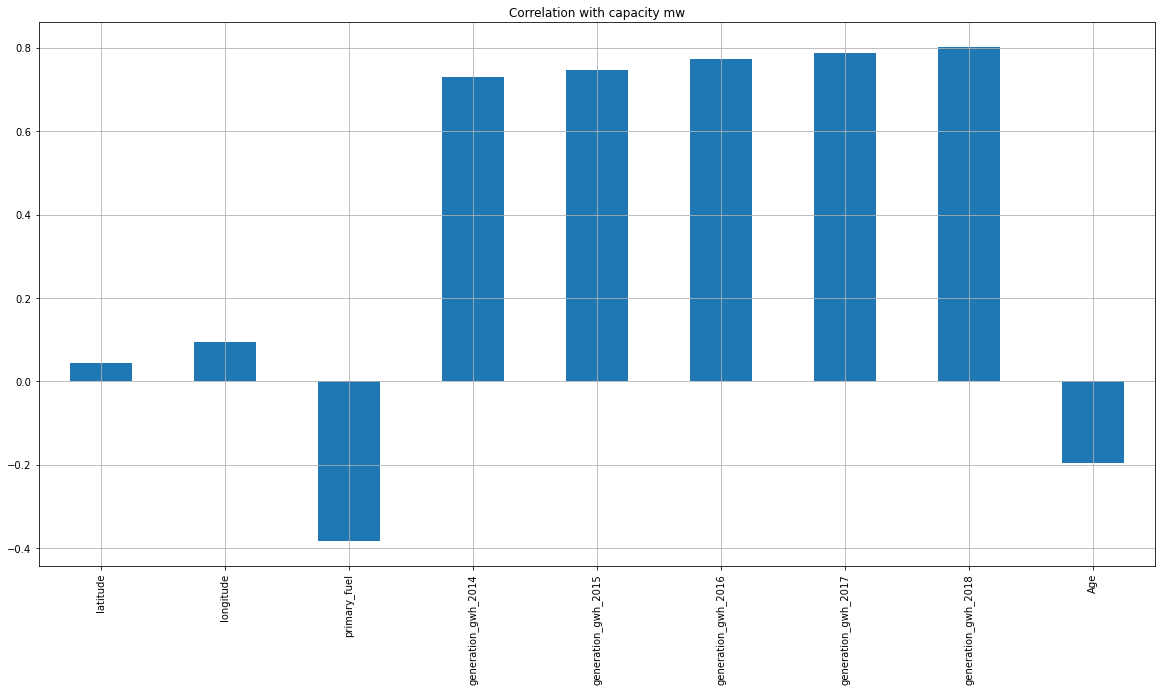

In [407]:
#Checking for correlation
data.drop(['capacity_mw'],axis=1).corrwith(data['capacity_mw']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with capacity mw')
plt.show()

**In this plot we can see that column generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2014 are highly correlated to the label and column latitude and longitude are very less correlated to the label.**

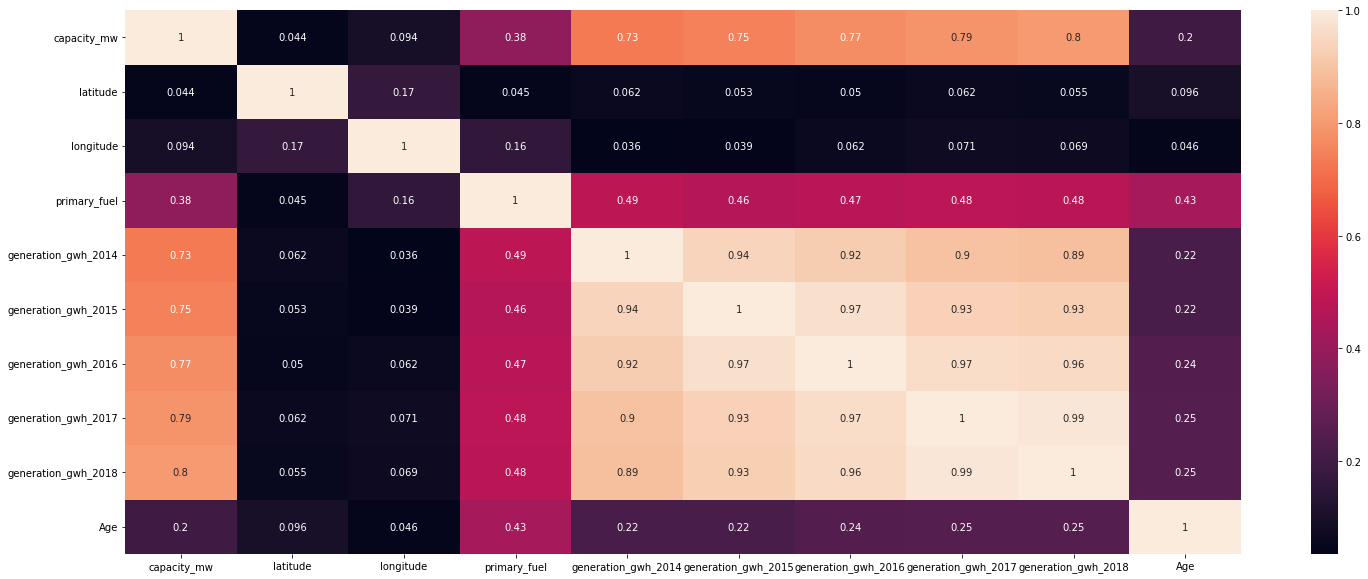

In [408]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **we can see that column generation_gwh_2014,generation_gwh_2015 generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 are multicorrelated with each other.**
* **so further i will plot scatterplot to check the trend.**

**In classification model we have seen that all the above mentioned colums are multicorrelated so further i will be using vif and will take further steps.**

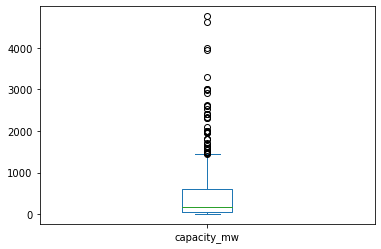

In [409]:
#Checking for outliers
data['capacity_mw'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

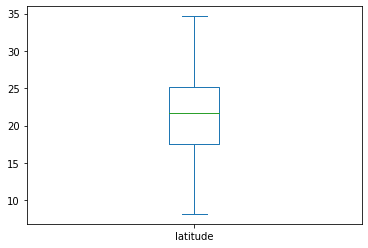

In [410]:
#Checking for outliers
data['latitude'].plot.box()
plt.show()

**In this plot we can see that outliers are not present.**

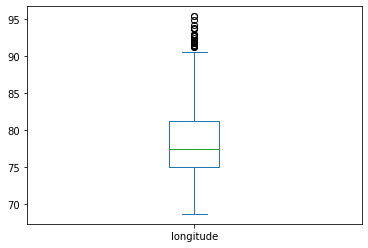

In [411]:
#Checking for outliers
data['longitude'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

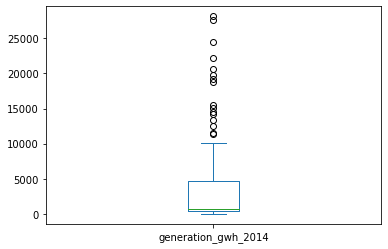

In [412]:
#Checking for outliers
data['generation_gwh_2014'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

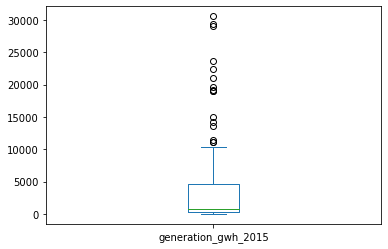

In [413]:
#Checking for outliers
data['generation_gwh_2015'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

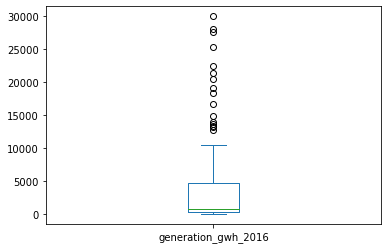

In [414]:
#Checking for outliers
data['generation_gwh_2016'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

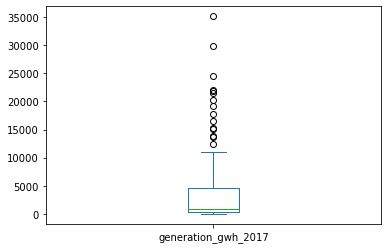

In [415]:
#Checking for outliers
data['generation_gwh_2017'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

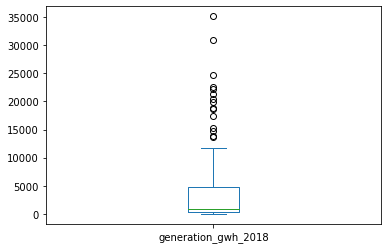

In [416]:
#Checking for outliers
data['generation_gwh_2018'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

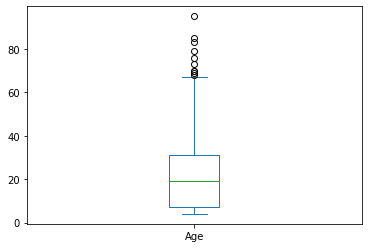

In [417]:
#Checking for outliers
data['Age'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

In [418]:
#Importing required libraries
from scipy.stats import zscore

In [419]:
#Removing outliers
z_score=zscore(data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [420]:
data=data[z]

In [421]:
data.shape

(582, 10)

In [422]:
#Percentage Loss of Data
data_loss=((607-582)/607)*100
print(f'Data Loss:{data_loss} %')

Data Loss:4.118616144975288 %


In [423]:
#checking for skewness
data.skew()

capacity_mw            1.589799
latitude              -0.039478
longitude              0.970613
primary_fuel           0.431572
generation_gwh_2014    1.175875
generation_gwh_2015    1.175316
generation_gwh_2016    1.193725
generation_gwh_2017    1.149758
generation_gwh_2018    1.241028
Age                    1.032662
dtype: float64

**In this we can see that in column capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 skewness is present.so by using power transform method i will try to treat the skewness.**

In [424]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [425]:
#using power transform method
data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']],method='yeo-johnson')
data[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,-0.332452,-0.783407,1.142148,1.157613,1.151839,1.139273,1.143537
3,-0.137166,2.013313,-0.411478,-0.125342,-0.090753,-0.245315,-0.289474
4,1.651620,0.938470,0.722774,1.389210,1.407168,1.229854,1.487012
5,0.254116,-3.057343,-0.026183,0.099619,0.082635,0.066989,-0.045190
6,-0.620818,-0.139871,-1.050668,-0.948746,-1.229213,-1.072604,-1.258247
...,...,...,...,...,...,...,...
893,-0.598247,-0.006207,-0.988973,-0.876875,-0.812431,-0.841002,-0.735768
899,0.846057,-0.063358,0.768199,0.953325,0.788290,0.774248,0.722672
901,-0.281703,-0.002616,-2.089798,-2.022669,-1.992203,-1.901164,-1.921031
902,1.561772,-0.055974,1.142148,-1.944521,-0.757199,-0.099623,-0.241250


In [426]:
#checking skewness
data.skew()

capacity_mw           -0.046674
latitude              -0.039478
longitude              0.042392
primary_fuel           0.431572
generation_gwh_2014   -0.161881
generation_gwh_2015   -0.172072
generation_gwh_2016   -0.179402
generation_gwh_2017   -0.205475
generation_gwh_2018   -0.199188
Age                    1.032662
dtype: float64

**So we can see that skewness have been removed.**

In [427]:
#Dividing dataset into features and label
#Features
x=data.drop(['capacity_mw'],axis=1)
#Label
y=data['capacity_mw']

In [428]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 5.30184338e-01, -7.83407932e-01, -1.04492407e+00, ...,
         1.13927271e+00,  1.14353731e+00, -9.22902789e-01],
       [ 3.88058263e-01,  2.01331226e+00, -1.27660407e-01, ...,
        -2.45314566e-01, -2.89474120e-01, -2.50114853e-01],
       [ 8.46410833e-02,  9.38469081e-01, -1.04492407e+00, ...,
         1.22985379e+00,  1.48701228e+00, -9.22902789e-01],
       ...,
       [-1.31974111e+00, -2.61642185e-03,  2.62413059e+00, ...,
        -1.90116401e+00, -1.92103080e+00,  4.22673083e-01],
       [-8.14924404e-01, -5.59746436e-02, -1.04492407e+00, ...,
        -9.96225709e-02, -2.41250454e-01, -9.84065329e-01],
       [ 4.64083249e-01, -1.04633340e+00, -1.04492407e+00, ...,
         1.13927271e+00,  1.14353731e+00, -9.22902789e-01]])

In [429]:
x_scaler.shape

(582, 9)

In [430]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [431]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.043256,latitude
1,1.077527,longitude
2,1.910609,primary_fuel
3,3.443549,generation_gwh_2014
4,6.354975,generation_gwh_2015
5,10.606917,generation_gwh_2016
6,14.586623,generation_gwh_2017
7,12.444982,generation_gwh_2018
8,1.255605,Age


**In this we can see that column generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and generation_gwh_2018 are having vif value more than 5.so we cant drop all the 4 features so dropping column which is less correlated to the label. So as we can see in the above heatmap is that column generation_gwh_2014 is less correlated to the capacity mw(label) among the others that is why iam dropping this column.**

In [432]:
#Dividing dataset into features and label
#Features
x_scaler=data.drop(['capacity_mw','generation_gwh_2014'],axis=1)
#Label
y=data['capacity_mw']

**I am not using feature selection method since there are few features left in the dataset.so iam connsidering all the features.**

In [447]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Gradient Boosting**

In [452]:
#Initiating Gradient Boosting Regression
rf=RandomForestRegressor()

In [453]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 97.07851596670068
at random state 0, testing accuracy is 80.55692395968521


at random state 1, training accuracy is 97.47477251999696
at random state 1, testing accuracy is 83.22808008834836


at random state 2, training accuracy is 97.67925005359483
at random state 2, testing accuracy is 83.54146490261498


at random state 3, training accuracy is 97.61266050882209
at random state 3, testing accuracy is 84.41590689548258


at random state 4, training accuracy is 97.66104373107235
at random state 4, testing accuracy is 80.09909715901583


at random state 5, training accuracy is 97.7528061080477
at random state 5, testing accuracy is 82.30875743748204


at random state 6, training accuracy is 97.30999343552814
at random state 6, testing accuracy is 84.14851199574086


at random state 7, training accuracy is 97.52517396587609
at random state 7, testing accuracy is 85.18648534243026


at random state 8, training accuracy is 97.24411300361507
at rand

**Taking random state=43.**

In [528]:
#since random state  has highest testing score,so taking random state as 43
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [529]:
#Training the Model
rf.fit(x_train,y_train)

RandomForestRegressor()

In [530]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [531]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 97.07839694635844

 Testing Score: 88.45184494034304


In [458]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [459]:
#Checking cross validation score for Random Forest
for j in range(2,6):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.7919439206098972and accuracy for the testing is 0.8808532967609861


at cross fold 3 the cv score is 0.8219966939455579and accuracy for the testing is 0.8808532967609861


at cross fold 4 the cv score is 0.8285462802156955and accuracy for the testing is 0.8808532967609861


at cross fold 5 the cv score is 0.8301747362719422and accuracy for the testing is 0.8808532967609861




**Taking cv=5.**

In [460]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

0.27135590070332216

In [461]:
#mean squared error
mean_squared_error(y_test,y_pred)

0.12369850901921595

In [462]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.3517079882789357

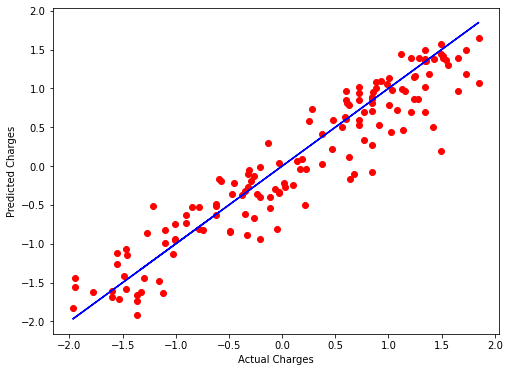

In [463]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**Gradient Boosting**

In [464]:
#Instantiating Random Forest
gb=GradientBoostingRegressor()

In [465]:
#since random state  has highest testing score,so taking random state as 43
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [466]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [469]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [470]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 91.73639173240781

 Testing score: 87.16399601460179


In [475]:
#Checking cross validation score for Gradient Boosting
cv_score=cross_val_score(gb,x,y,cv=5).mean()
cv_score

0.8221700525238701

In [476]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.28263120869391195

In [477]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.13326382615667356

In [478]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.36505318264147973

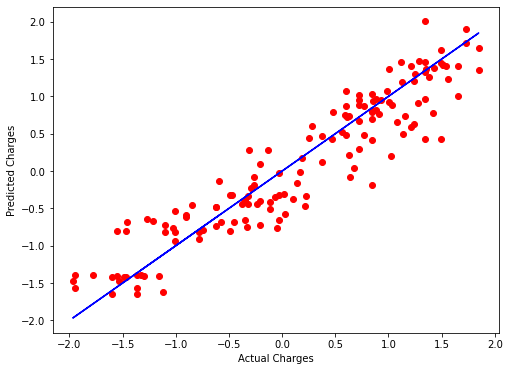

In [479]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**Ada Boost**

In [480]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [481]:
#since random state  has highest testing score,so taking random state as 43
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [482]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [483]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [484]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 76.92454928162364

 Testing Score: 78.30868791674719


In [485]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [486]:
#Checking cross validation score for Ada Boost
cv_score=cross_val_score(ada,x,y,cv=5).mean()
cv_score

0.7440210557585384

In [487]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.35858535657990026

In [488]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.22519993339524352

In [489]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.47455235053178646

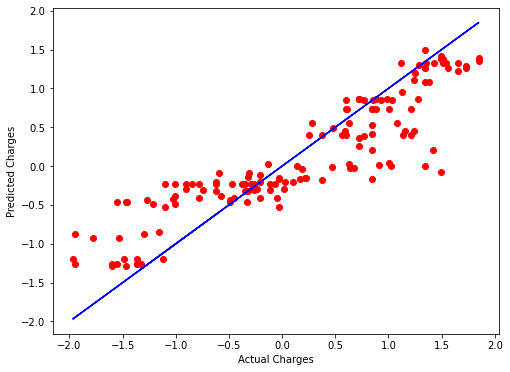

In [490]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**SUPPORT VECTOR Machine**

In [503]:
#Instantiating svm
svr=SVR()

In [504]:
#since random state  has highest testing score,so taking random state as 43
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [505]:
#Training data
svr.fit(x_train,y_train)

SVR()

In [506]:
pred=svr.predict(x_train)
y_pred=svr.predict(x_test)

In [507]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 20.045506350190788

 Testing Score: 21.59273866491802


In [508]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [509]:
#Checking cross validation score for svm
cv_score=cross_val_score(svr,x,y,cv=5).mean()
cv_score

0.18203462985628668

In [510]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.7416083518463187

In [511]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.8140268307695674

In [512]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.902234354682622

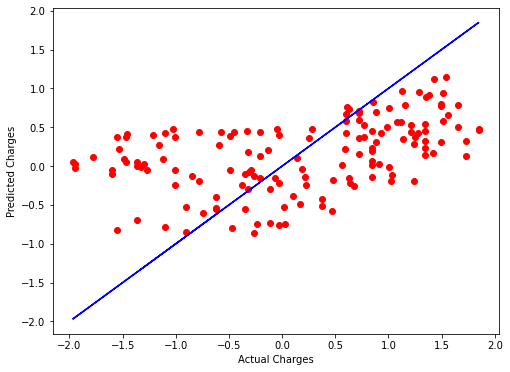

In [513]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

In [532]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Random forest','Gradient Boosting','Ada Boost','SVM'],
    'Training Score':[97.05,91.73,76.92,20.04],
    'Testing Score':[88.45,87.16,78.30,21.59],
    'cv score':[83.01,82.21,74.40,18.20],
    'RMSE':[0.35,0.36,0.47,0.90]
})
data

,Models,Training Score,Testing Score,cv score,RMSE
0,Random forest,97.05,88.45,83.01,0.35
1,Gradient Boosting,91.73,87.16,82.21,0.36
2,Ada Boost,76.92,78.30,74.40,0.47
3,SVM,20.04,21.59,18.20,0.90


**Observation**
* **By going through each and very model we can see that Random forest have seen most of the data that is 97.05% which is the highest and also the testing score is highest among other model that is 88.08%. Cross validation score is close to the testing score and RMSE is less as compared to other models.**
* **So i iam going forward with Random Forest.**

In [517]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [518]:
param_grid=({
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['mse', 'mae']
})

In [519]:
grid_search=GridSearchCV(rf1,param_grid=param_grid,cv=5)

In [520]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [521]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [533]:
#Training with the best parameters
rf1=RandomForestRegressor(criterion='mae',max_depth=8,max_features='log2',n_estimators=200)
rf1.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=8, max_features='log2',
                      n_estimators=200)

In [534]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 97.07839694635844

 Testing Score: 88.45184494034304


In [535]:
#Checking cross validation score for Random forest
cv_score=cross_val_score(rf1,x,y,cv=5).mean()
cv_score

0.8412343106769169

In [536]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

0.2647444142515696

In [537]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

0.11989333518835714

In [538]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

0.3462561698921149

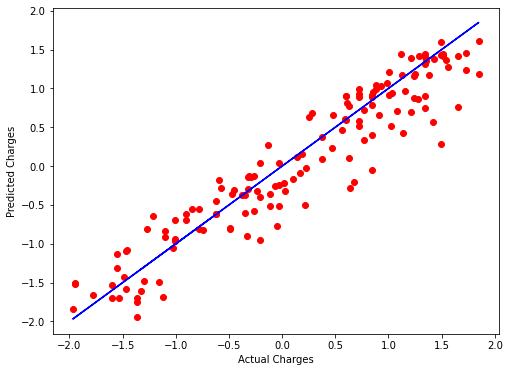

In [539]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Charges',fontsize=10)
plt.ylabel('Predicted Charges',fontsize=10)
plt.show()

**Observation**
* **In this we can see that after hyperparameter tuning testing score remains same and cross-validation score increases and rmse decreases.**
* **so will be saving this model which is tuned with the help hyperparameter tuning.**

In [540]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rf1,open('Global Power Plant Regressor','wb'))